In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
from sklearn.linear_model import LinearRegression
import math
from os import listdir

# Laad de data in
Bestand Cat3_pat36_meting1_oef4.csv als voorbeeld van DATA

In [20]:
df_cleaned = pd.read_csv('/data/ortho/Cat3_pat36_meting1_oef4.csv', header=None)

df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})
print(df_cleaned)

     thorax_r_x  thorax_r_y  thorax_r_z  clavicula_r_x  clavicula_r_y  \
0      1.544388   -2.697581    1.120906     -13.556068       0.569462   
1      1.544388   -2.697581    1.120906     -13.383257       0.728867   
2      1.544388   -2.697581    1.120906     -13.532490       0.882248   
3      1.544388   -2.697581    1.120906     -13.532490       0.882248   
4      1.544388   -2.697581    1.120906     -13.778359       0.738744   
5      1.544388   -2.697581    1.120906     -13.885377       0.733712   
6      1.544388   -2.697581    1.120906     -13.924885       0.974575   
7      1.524773   -2.696412    1.120914     -13.833047       0.942294   
8      1.524773   -2.696412    1.120914     -13.878665       0.947954   
9      1.521594   -3.216554    0.883194     -13.343684       1.024200   
10     1.521594   -3.216554    0.883194     -13.183631       1.095137   
11     1.521594   -3.216554    0.883194     -13.155937       1.245539   
12     1.521594   -3.216554    0.883194     -13.216

# Hoe ziet de data er nu uit
Wordt niet gebruikt later

<IPython.core.display.Javascript object>


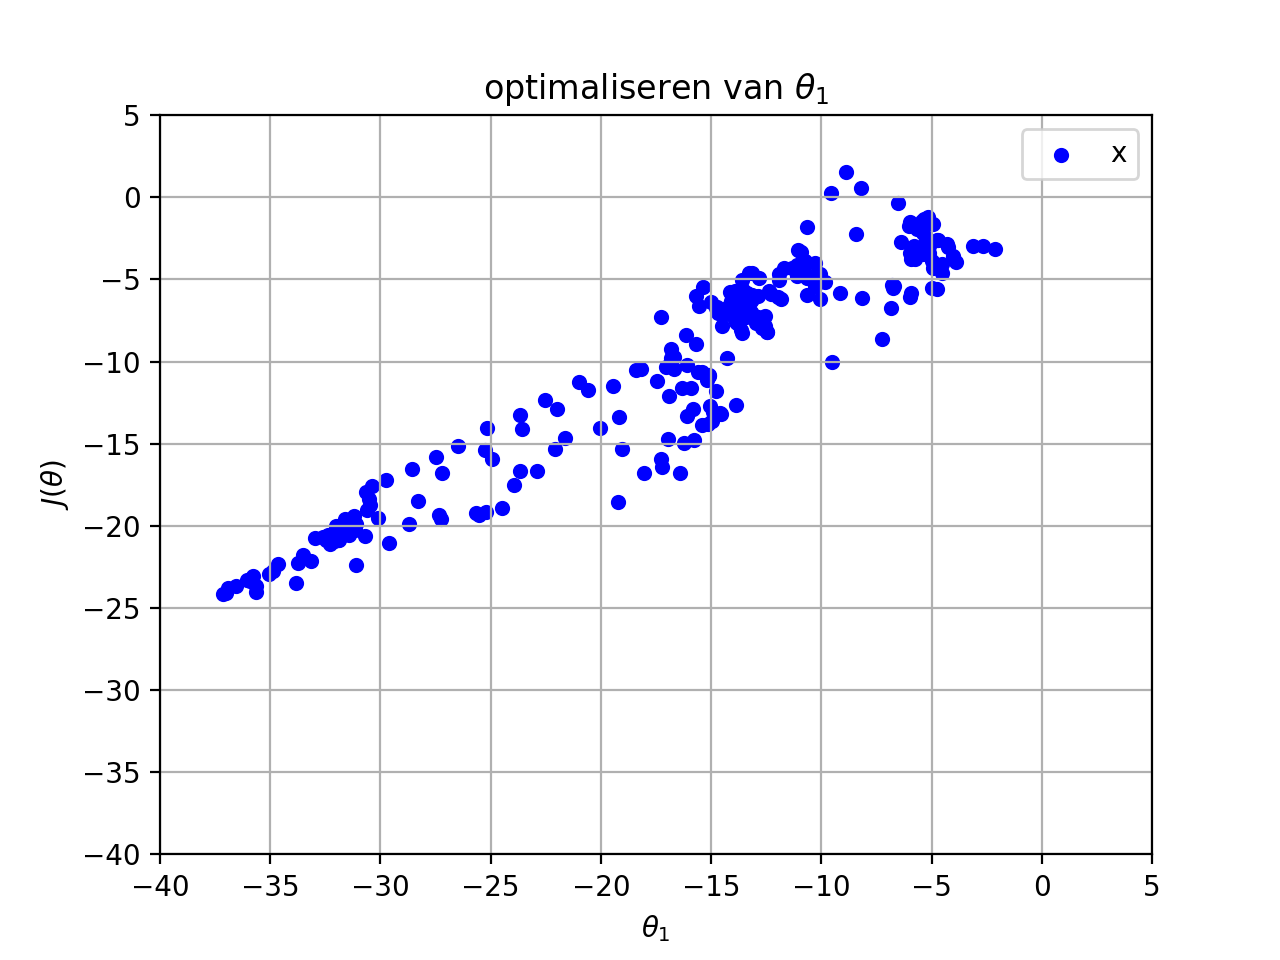

In [3]:
# ax1 = df_cleaned.plot.scatter(x='clavicula_r_x', y='clavicula_l_x',  c='blue', label='x')
# ax1.set_xlim(-40,5)
# ax1.set_ylim(-40,5)
# ax1.legend()
# ax1.grid()

# Regression zone
In de volgende 3 cellen wordt de regressie gemaakt

In [15]:
# Wordt met .copy() gekopieerd ipv verwezen
data = df_cleaned[['clavicula_r_x', 'clavicula_l_x']].copy()

lr = LinearRegression()
lr.fit(data[['clavicula_r_x']], data['clavicula_l_x'])
# lr.intercept_, lr.coef_ # hiermee wordt theta gevuld

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
plt.close()
data['bias'] = 1
theta = np.matrix([lr.intercept_, lr.coef_[0]]).T
# print(data)
X = np.matrix(data[['bias', 'clavicula_r_x']])
y = np.matrix(data[['clavicula_l_x']])
costs = []
for rico in range(-157,139):
    theta[1] = rico
    yh = X * theta
    d = yh - y
    j = d.T * d
    costs.append(j[0,0])
print(len(costs))
# plt.plot(range(-157,139), costs)
# plt.title(r'optimaliseren van $\theta_1$')
# plt.ylabel(r'$J(\theta)$')
# plt.xlabel(r'$\theta_1$')


296


<IPython.core.display.Javascript object>


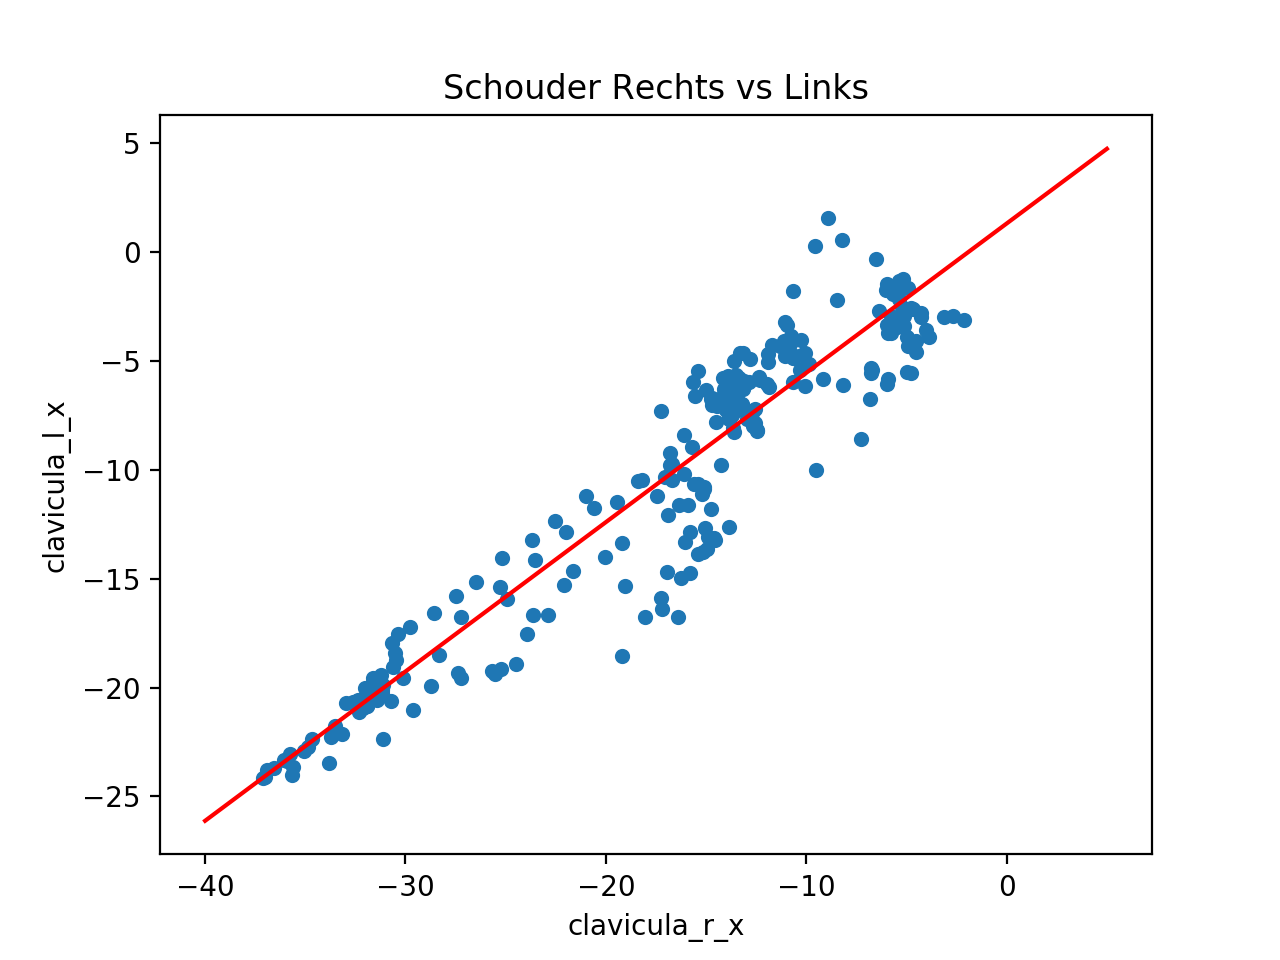

In [27]:

data.plot.scatter(x='clavicula_r_x', y='clavicula_l_x')
plt.title('Schouder Rechts vs Links')
plt.xlabel('clavicula_r_x')
plt.ylabel('clavicula_l_x')
line_x = np.matrix([[1, -40], [1 ,5]]) # 1 in de eerste kolom is de bias
theta = np.matrix([lr.intercept_, lr.coef_[0]]).T
line_y = line_x * theta
plt.plot(line_x[:, 1], line_y, '-', color='red')

# Standaard deviatie


In [36]:
df_cleaned[['clavicula_r_x', 'clavicula_l_x']]
RXavg = df_cleaned['clavicula_r_x'].mean()
RXs = math.sqrt(sum([(i-RXavg) ** 2 for i in df_cleaned['clavicula_r_x']])/(len(df_cleaned['clavicula_r_x'])-1))

LXavg = df_cleaned['clavicula_l_x'].mean()
LXs = math.sqrt(sum([(i-LXavg) ** 2 for i in df_cleaned['clavicula_l_x']])/(len(df_cleaned['clavicula_l_x'])-1))


print(RXs,LXs)

9.47412209769558 6.81745655980276


<IPython.core.display.Javascript object>


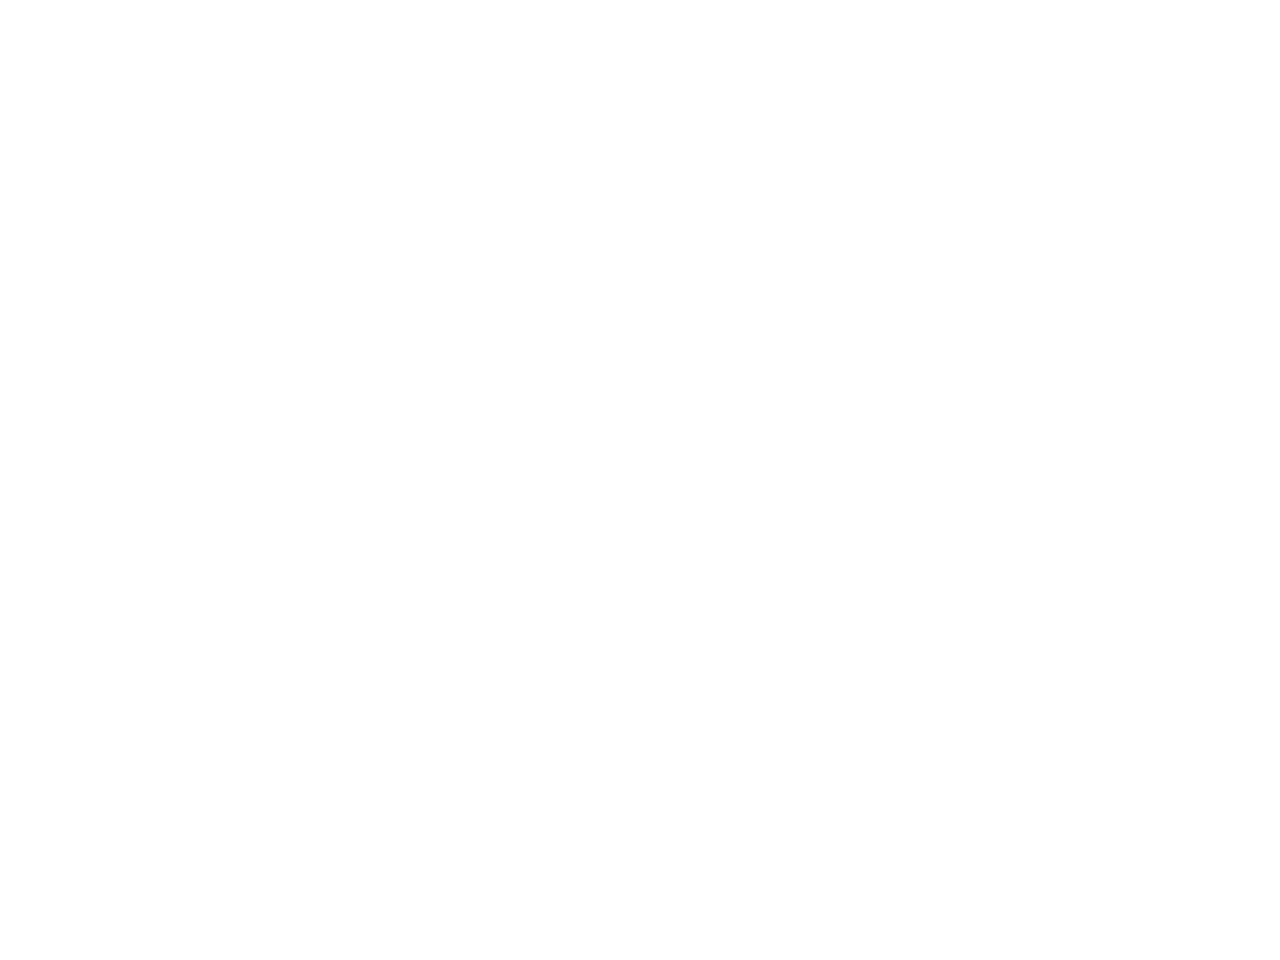

<IPython.core.display.Javascript object>


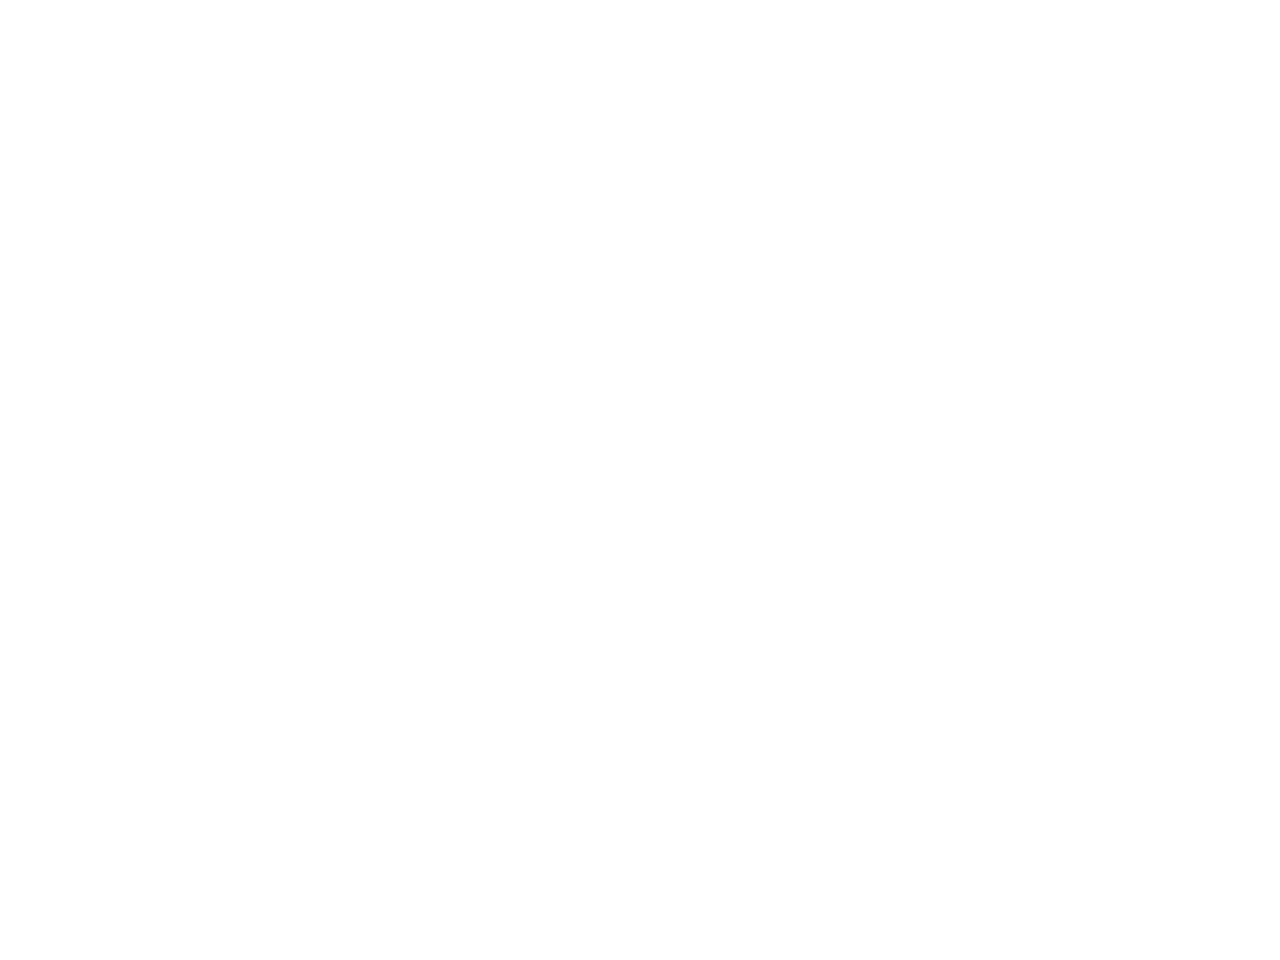

<IPython.core.display.Javascript object>


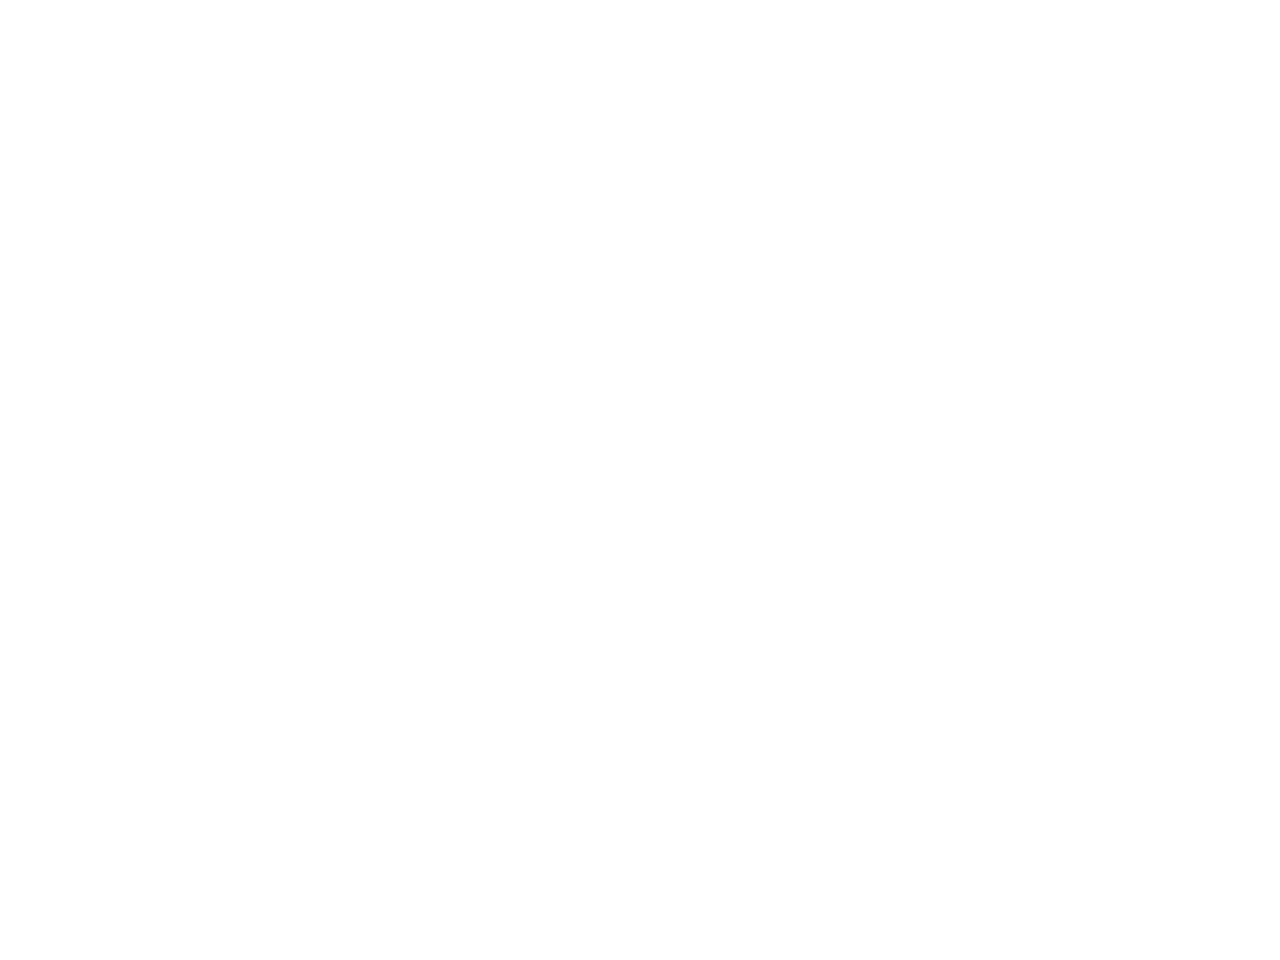

<IPython.core.display.Javascript object>


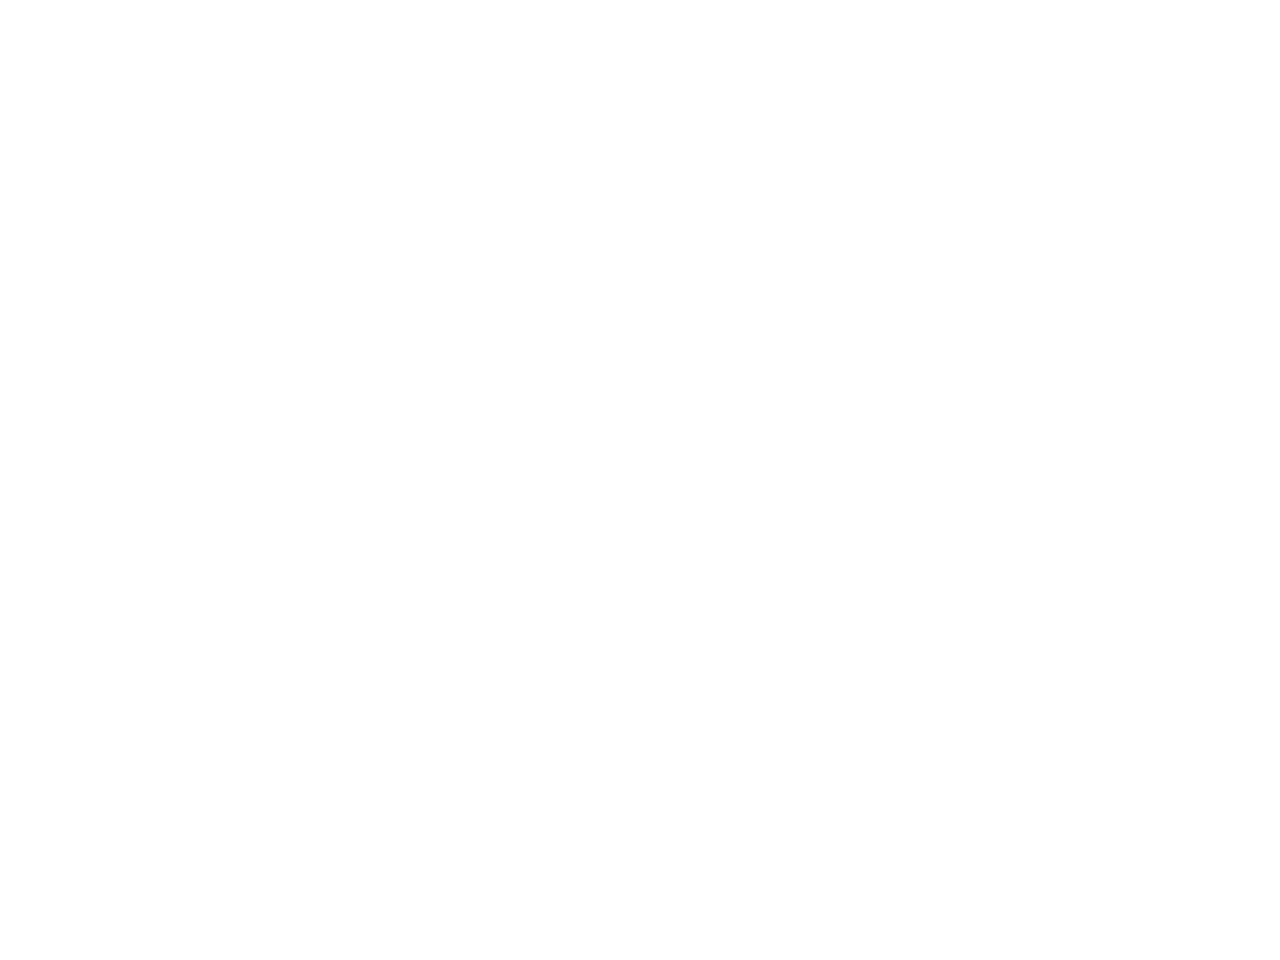

<IPython.core.display.Javascript object>


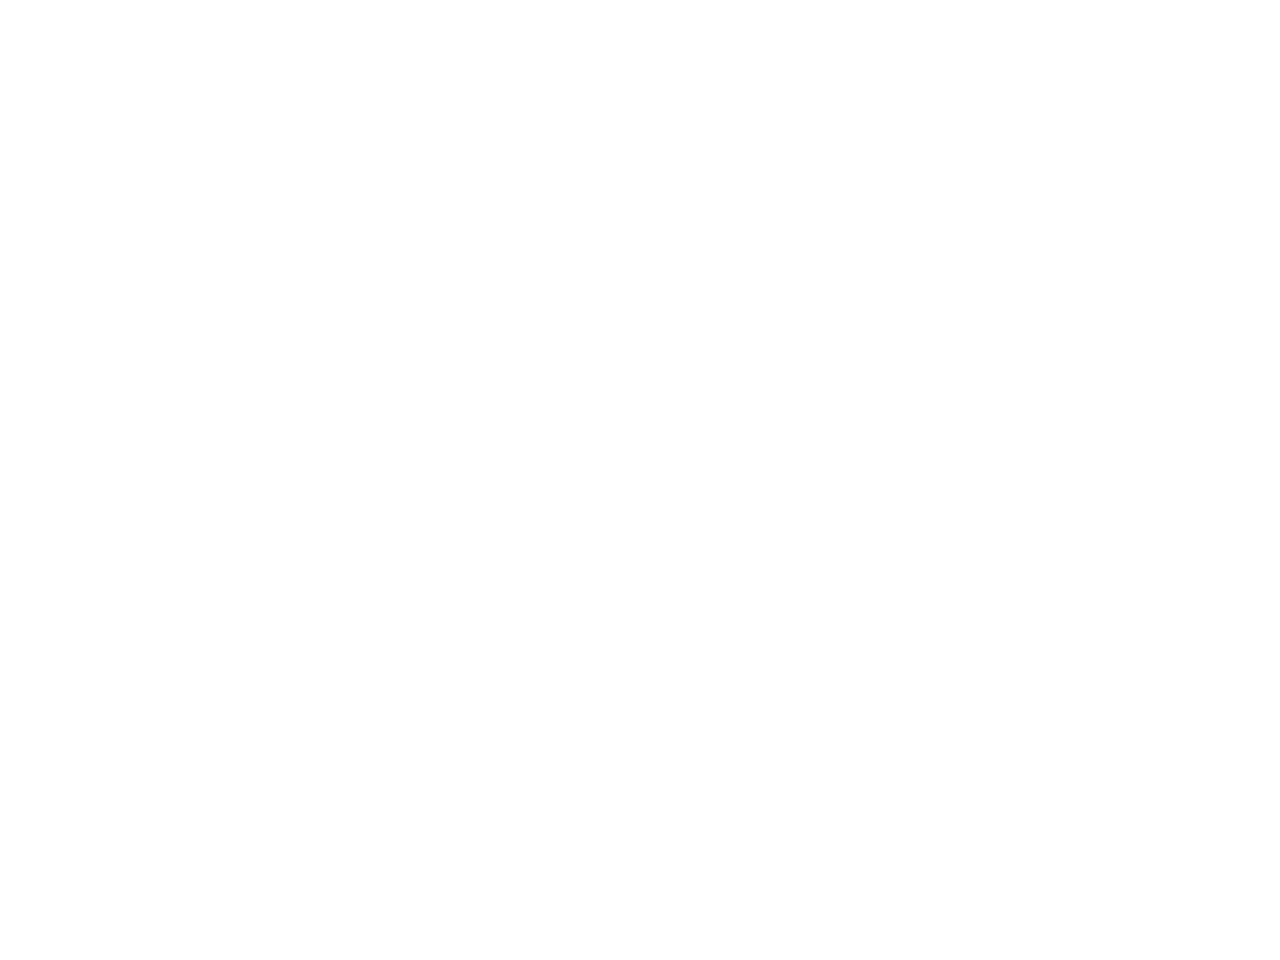

<IPython.core.display.Javascript object>


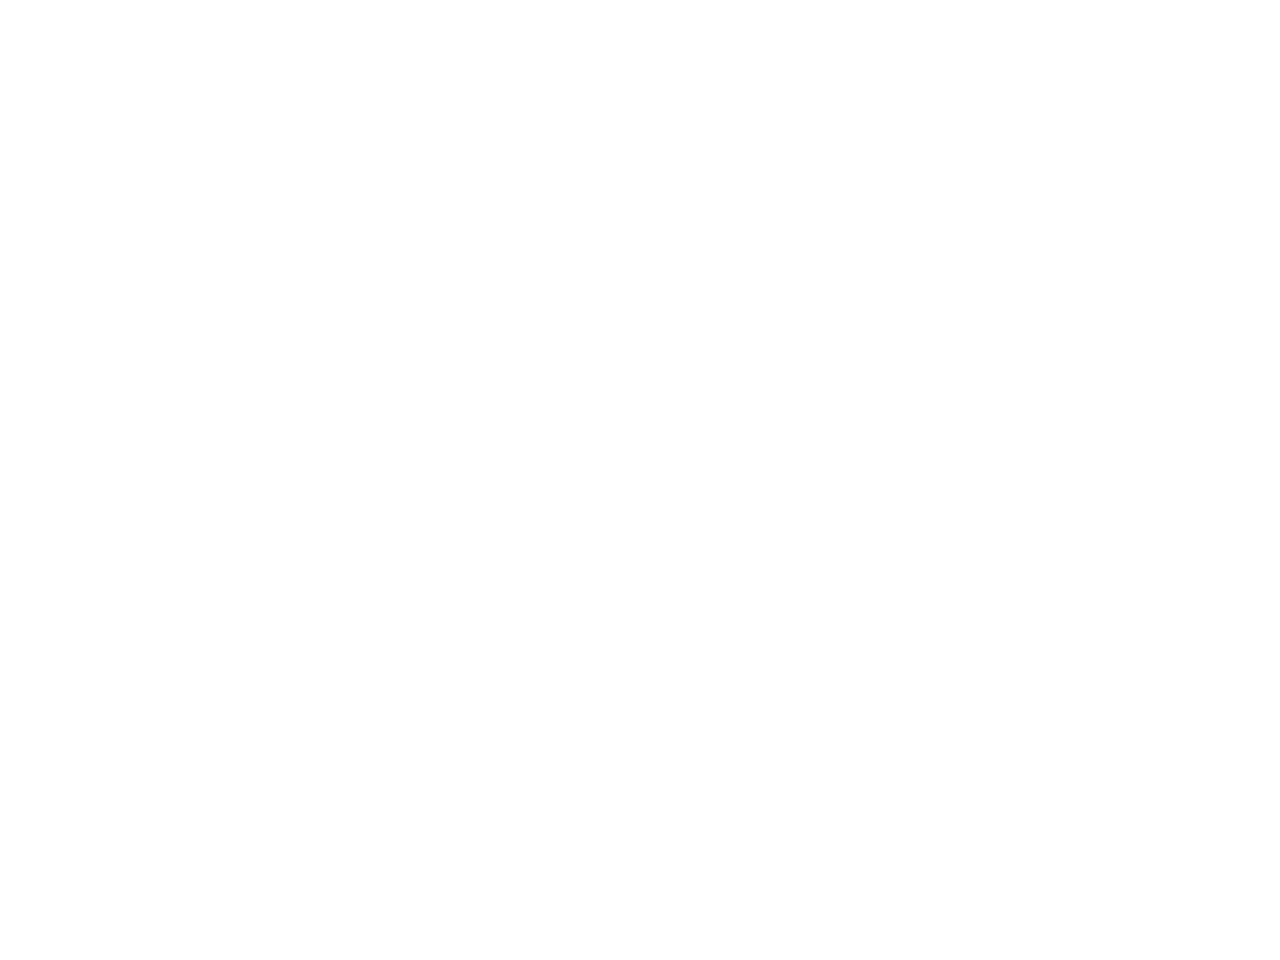

<IPython.core.display.Javascript object>


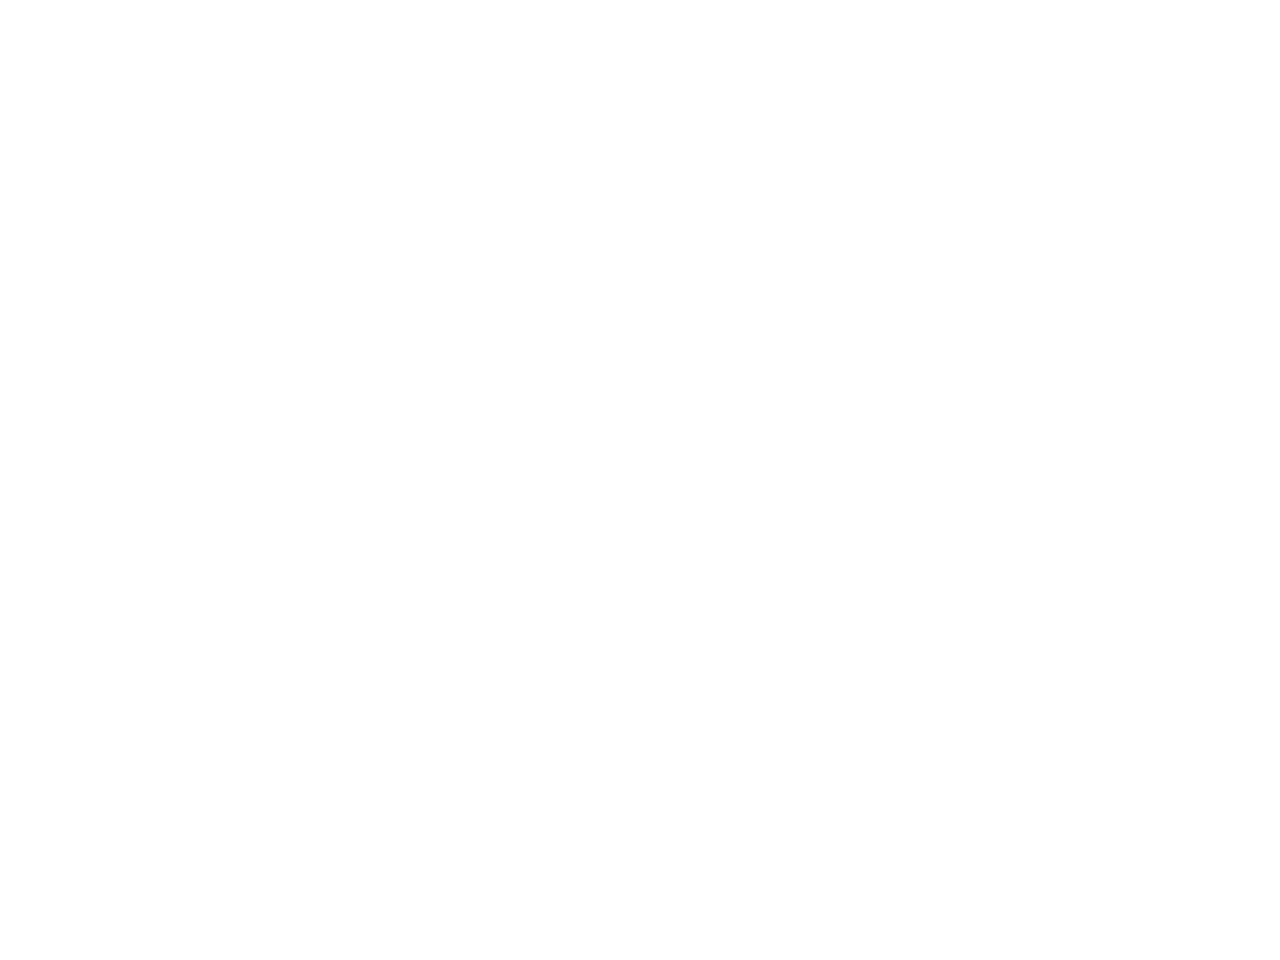

<IPython.core.display.Javascript object>


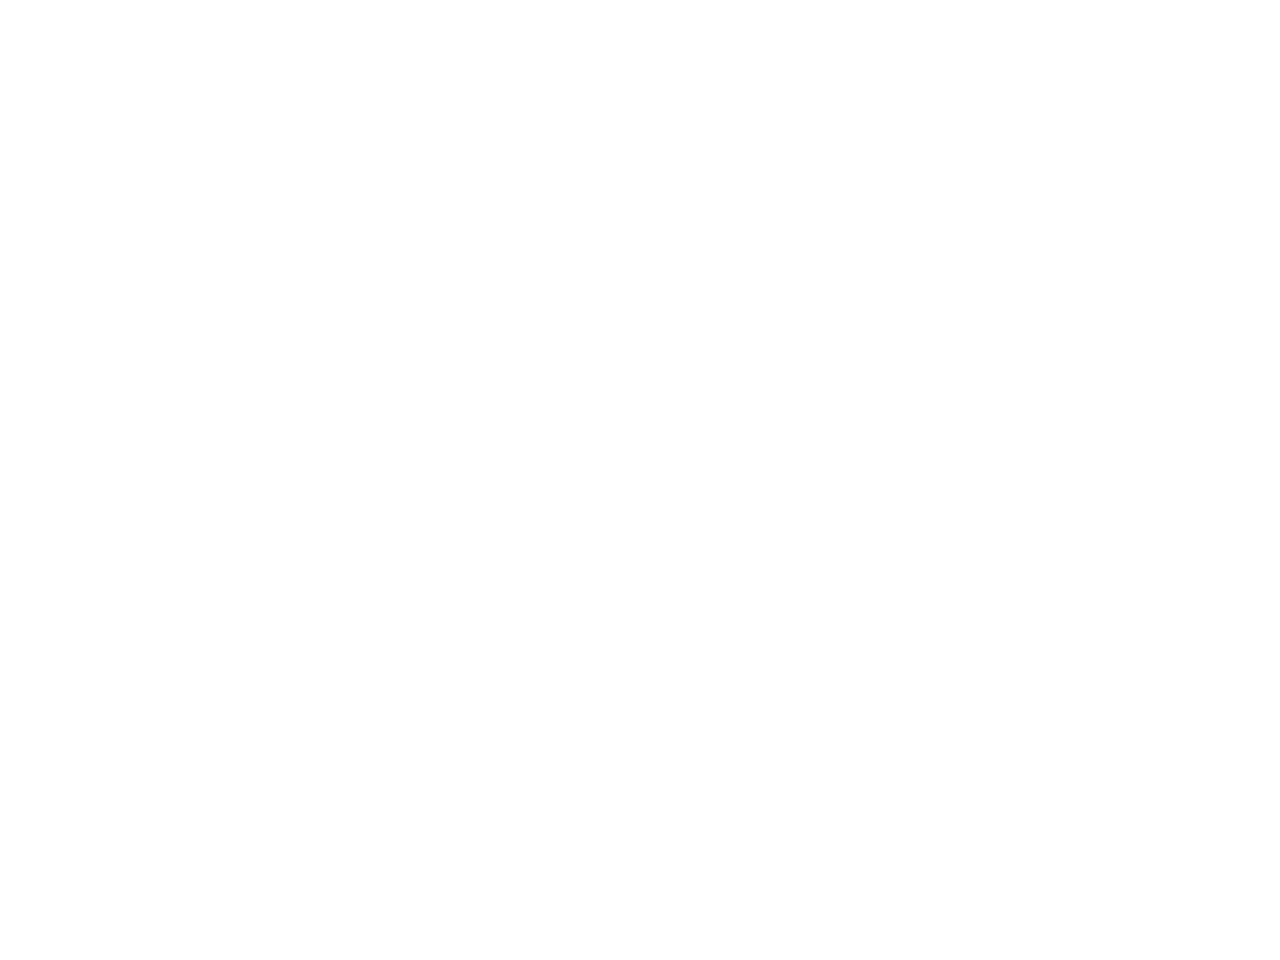

<IPython.core.display.Javascript object>


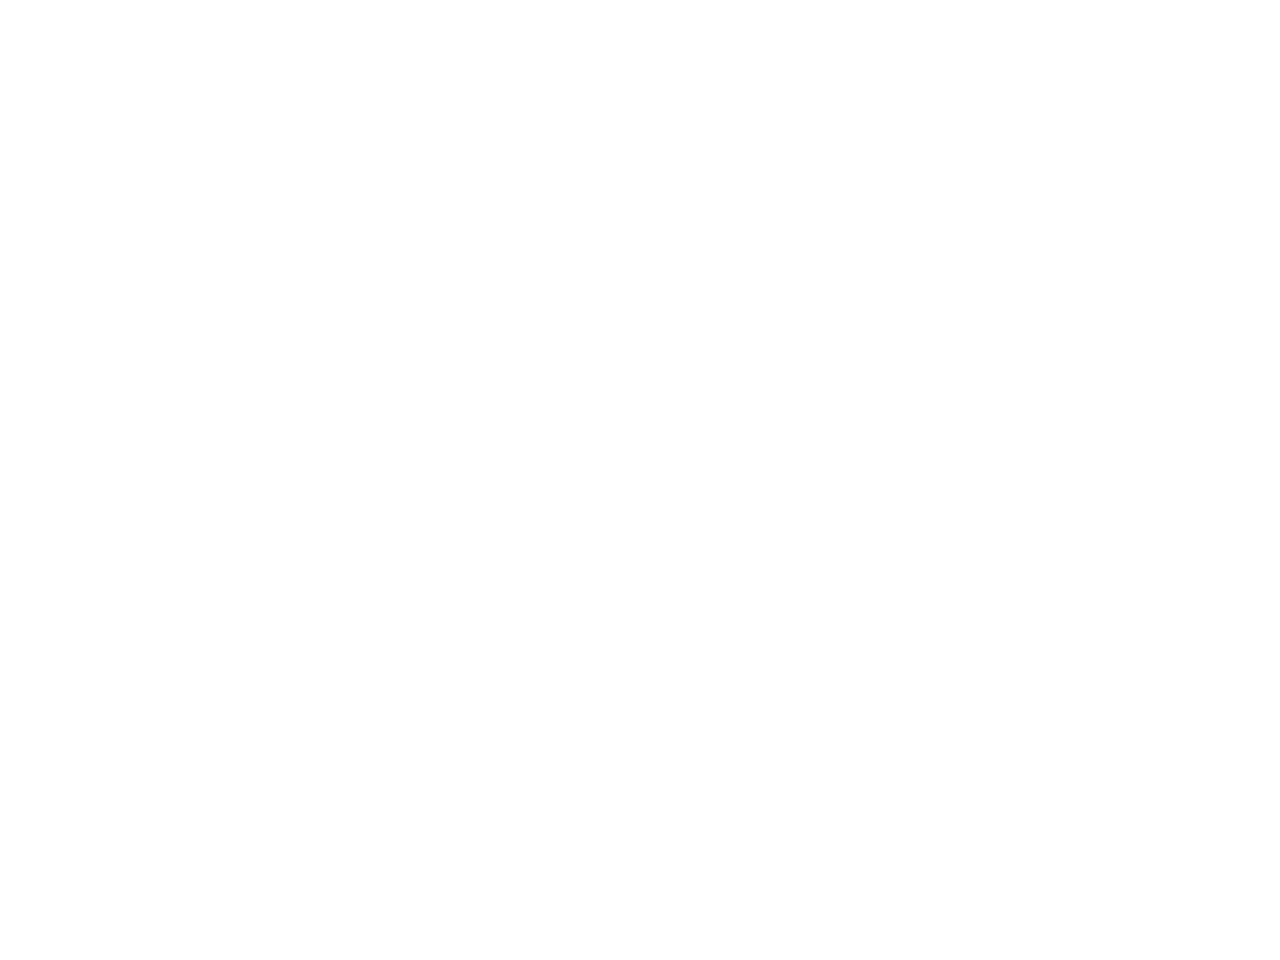

<IPython.core.display.Javascript object>


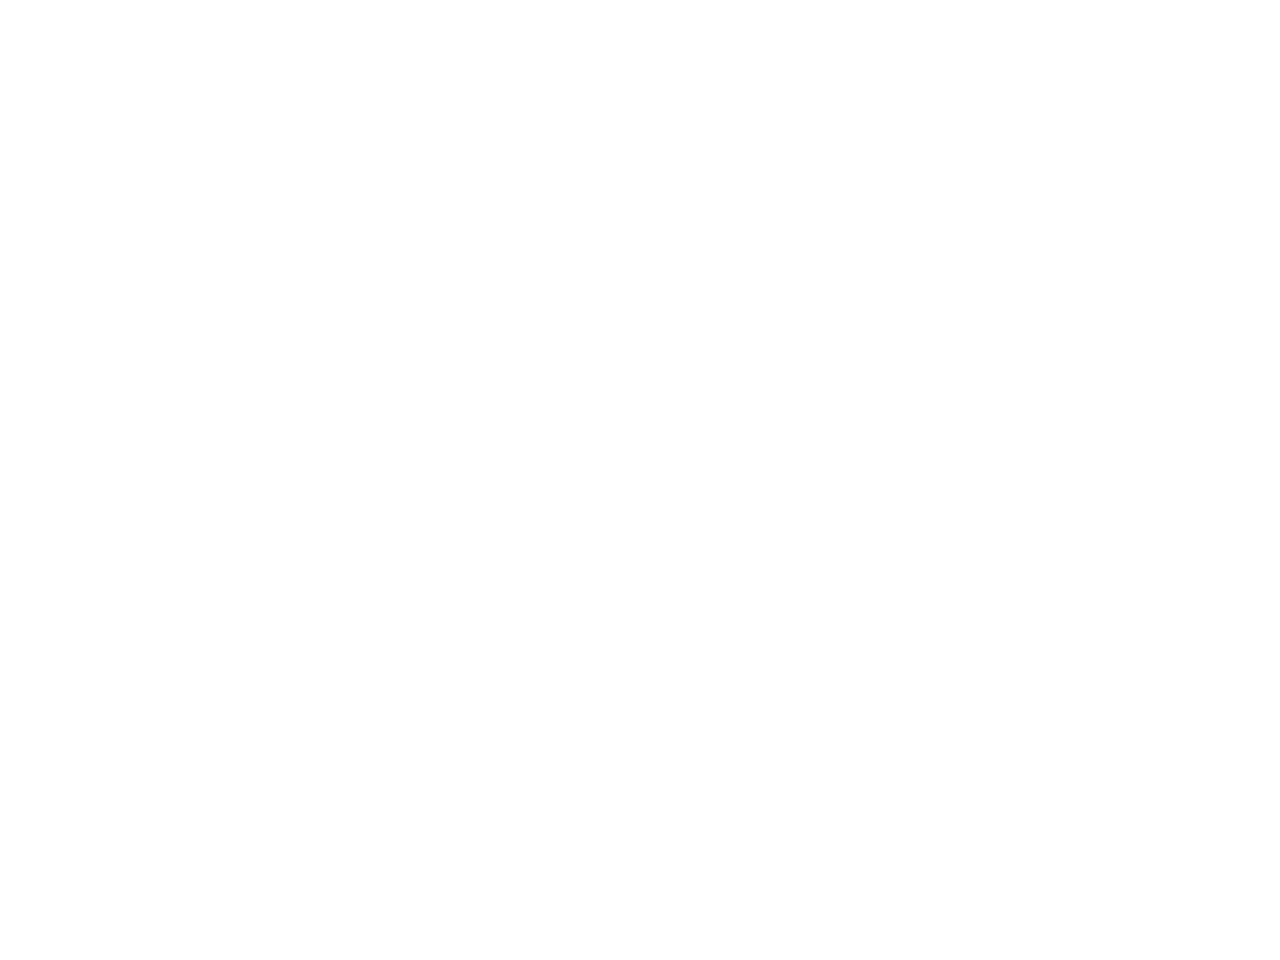

<IPython.core.display.Javascript object>


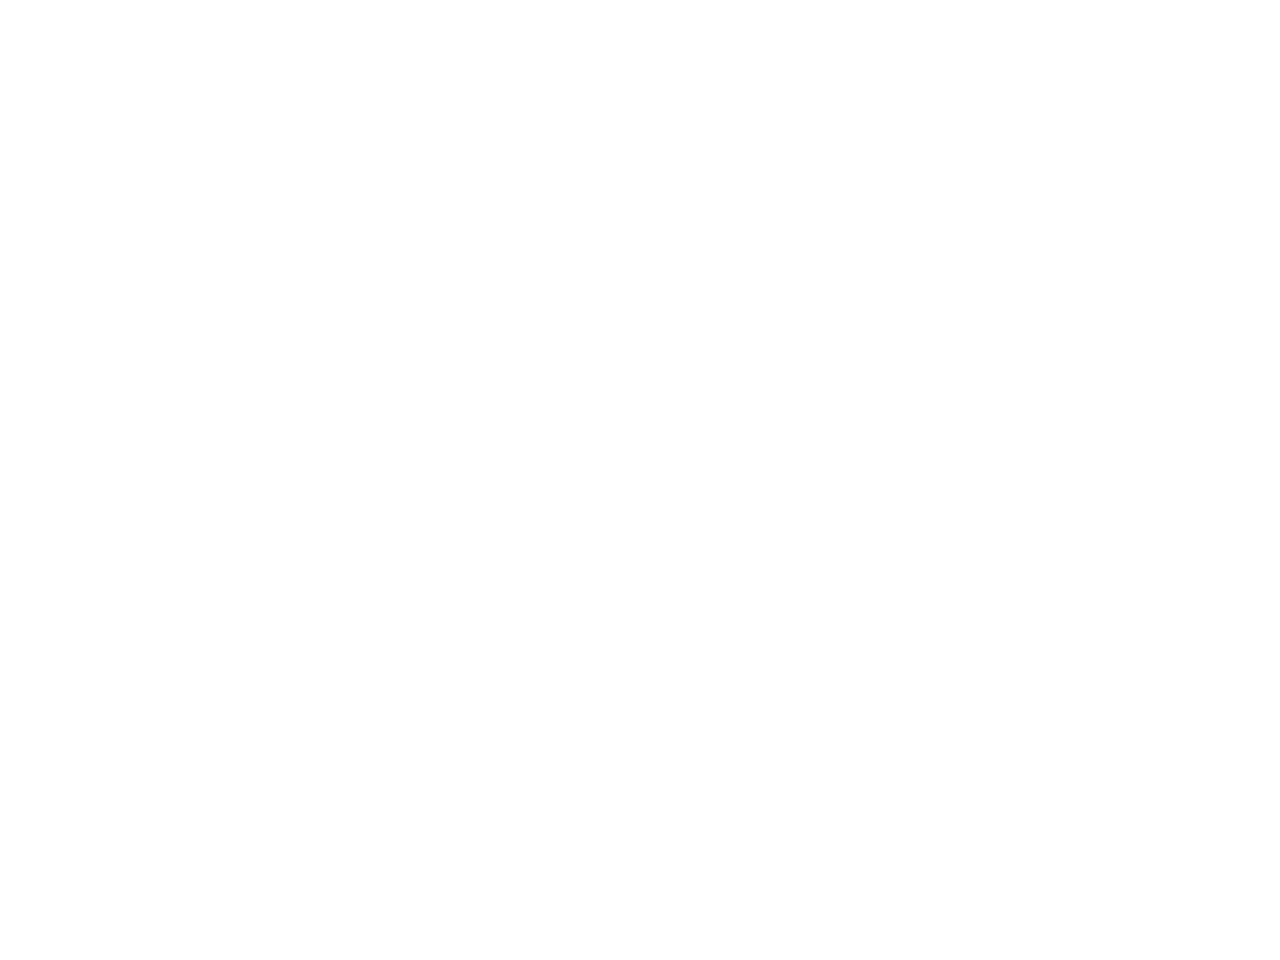

<IPython.core.display.Javascript object>


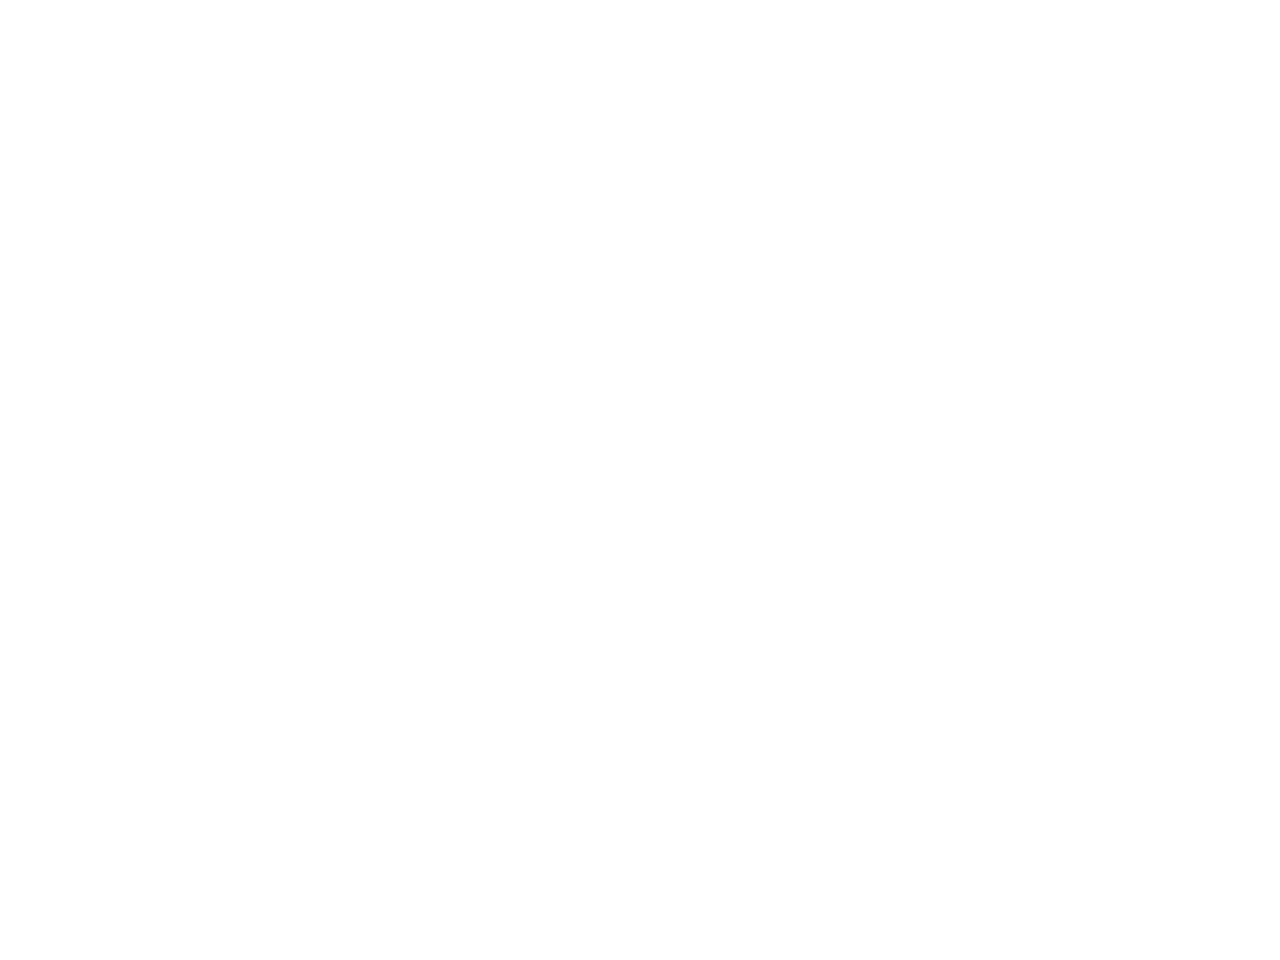

<IPython.core.display.Javascript object>


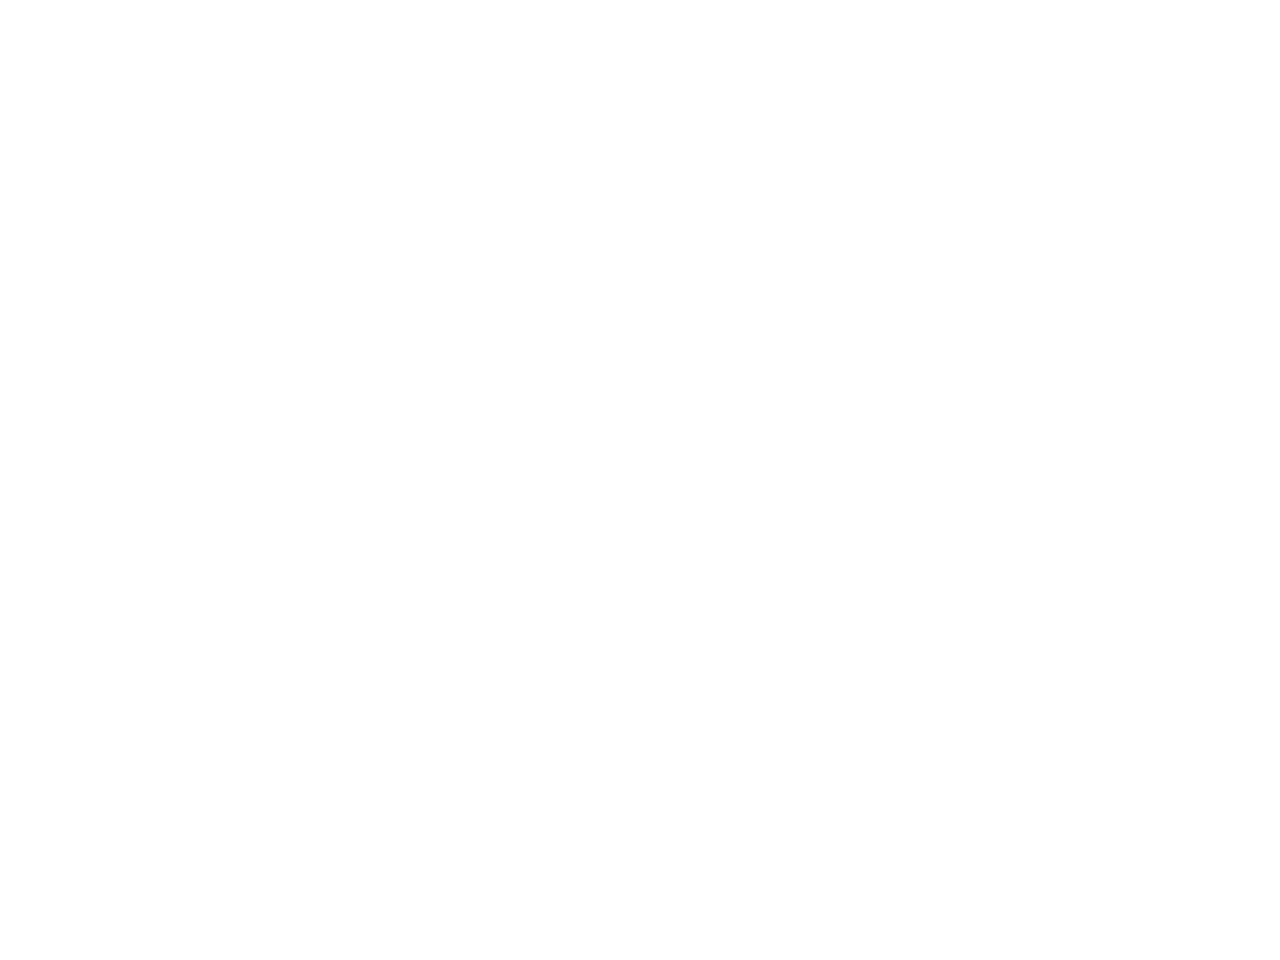

<IPython.core.display.Javascript object>


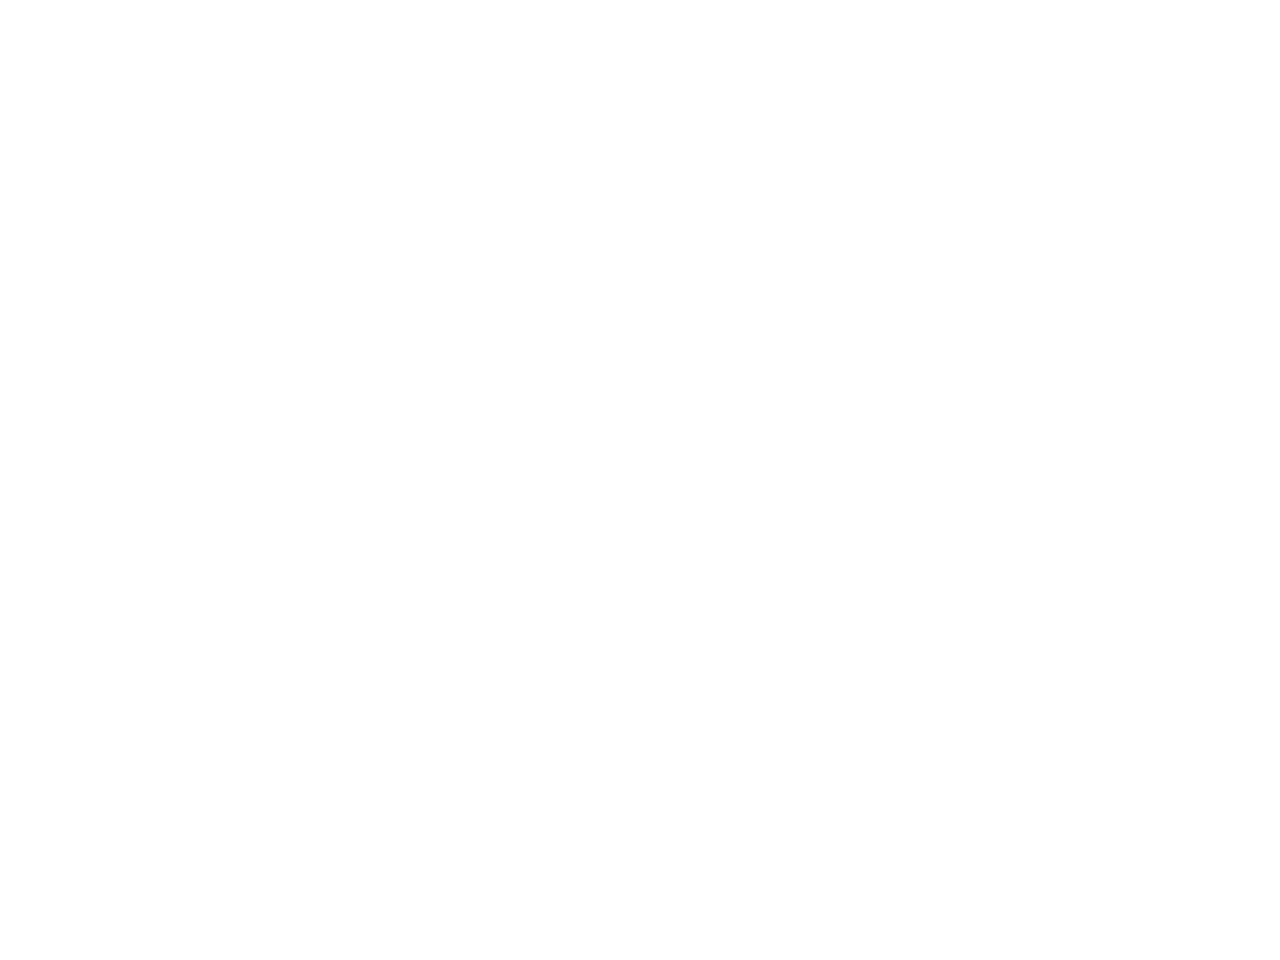

<IPython.core.display.Javascript object>


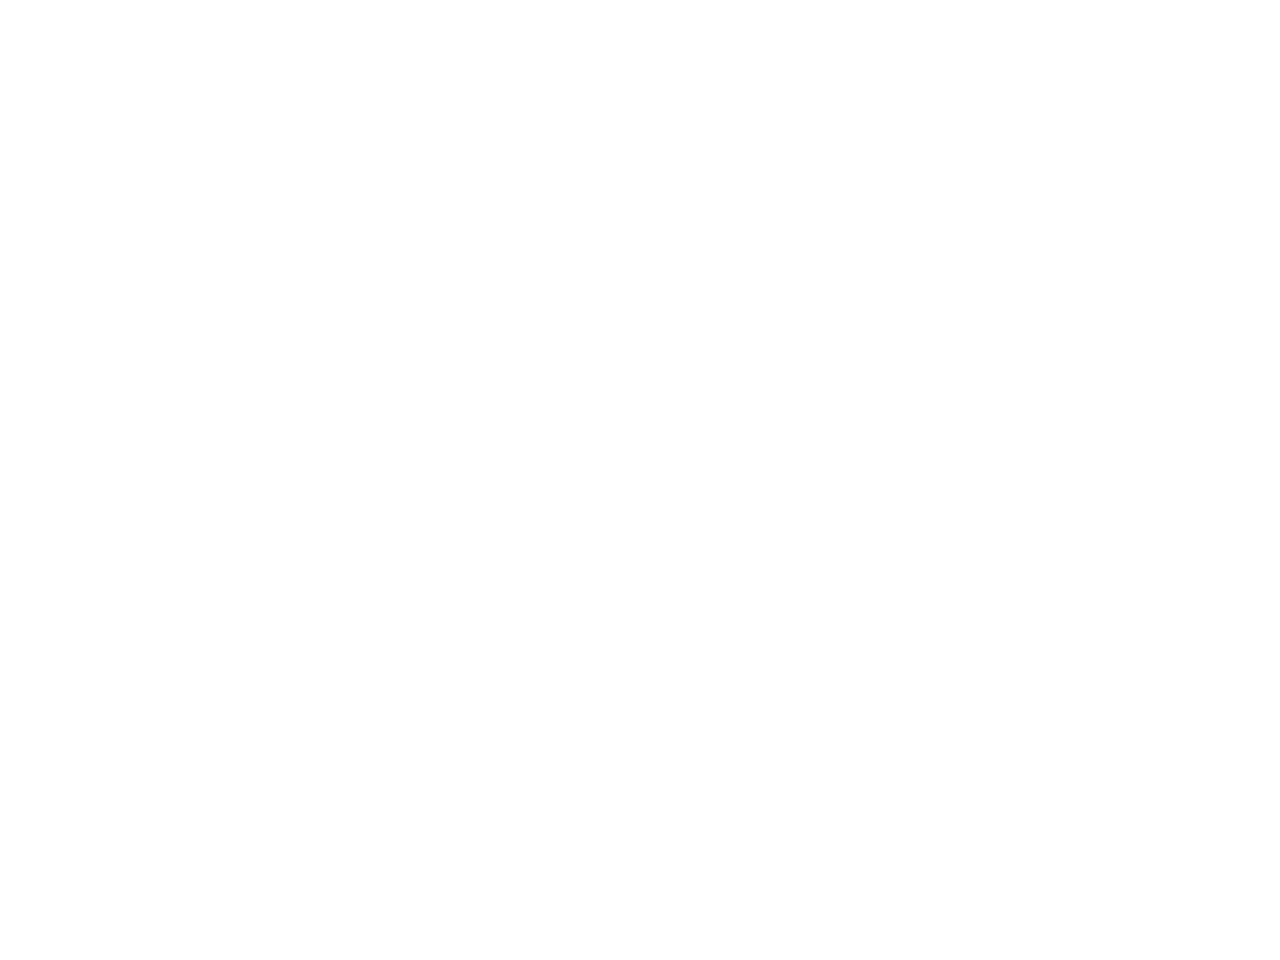

<IPython.core.display.Javascript object>


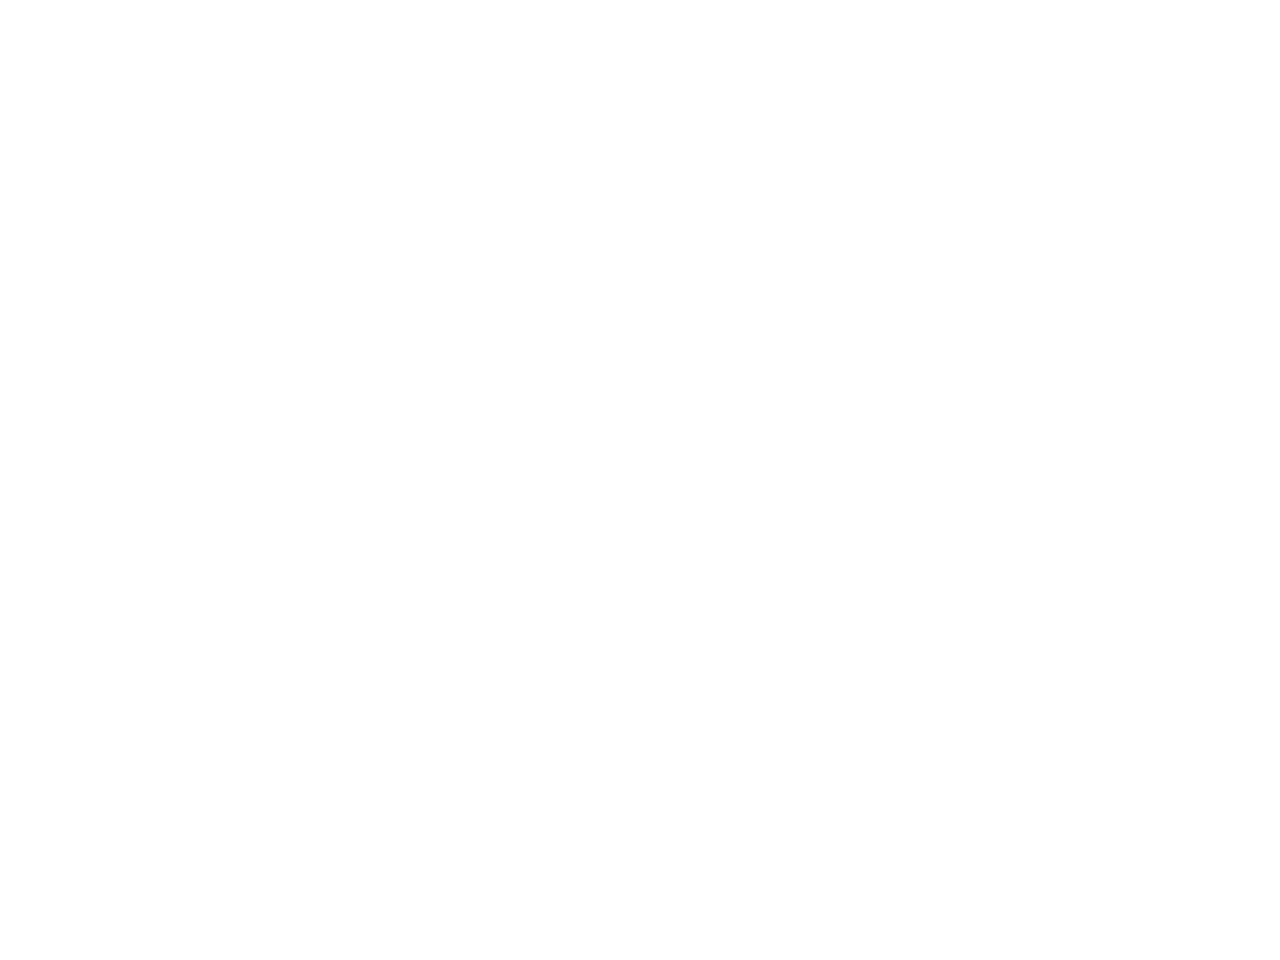

<IPython.core.display.Javascript object>


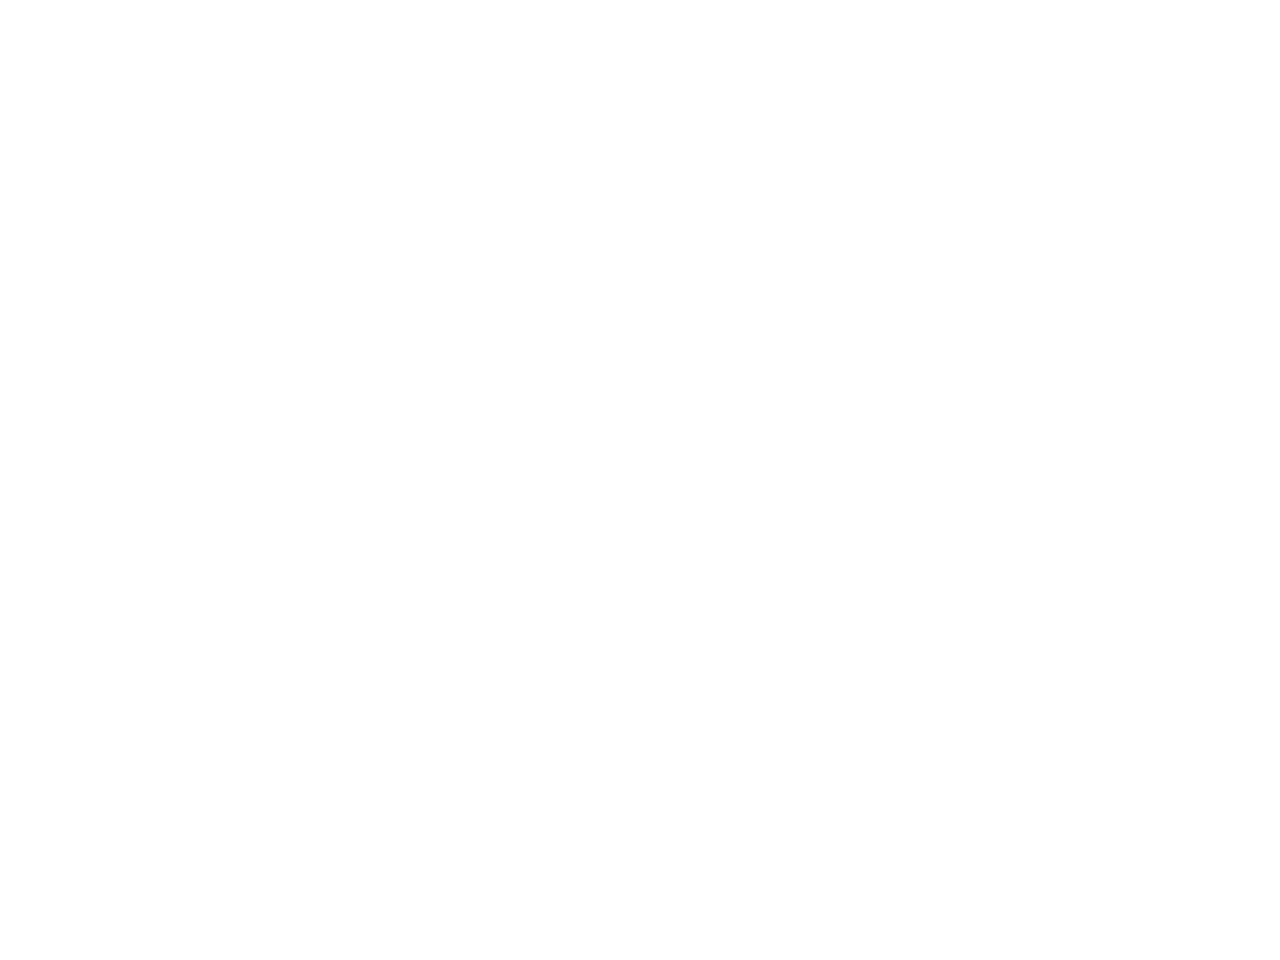

<IPython.core.display.Javascript object>


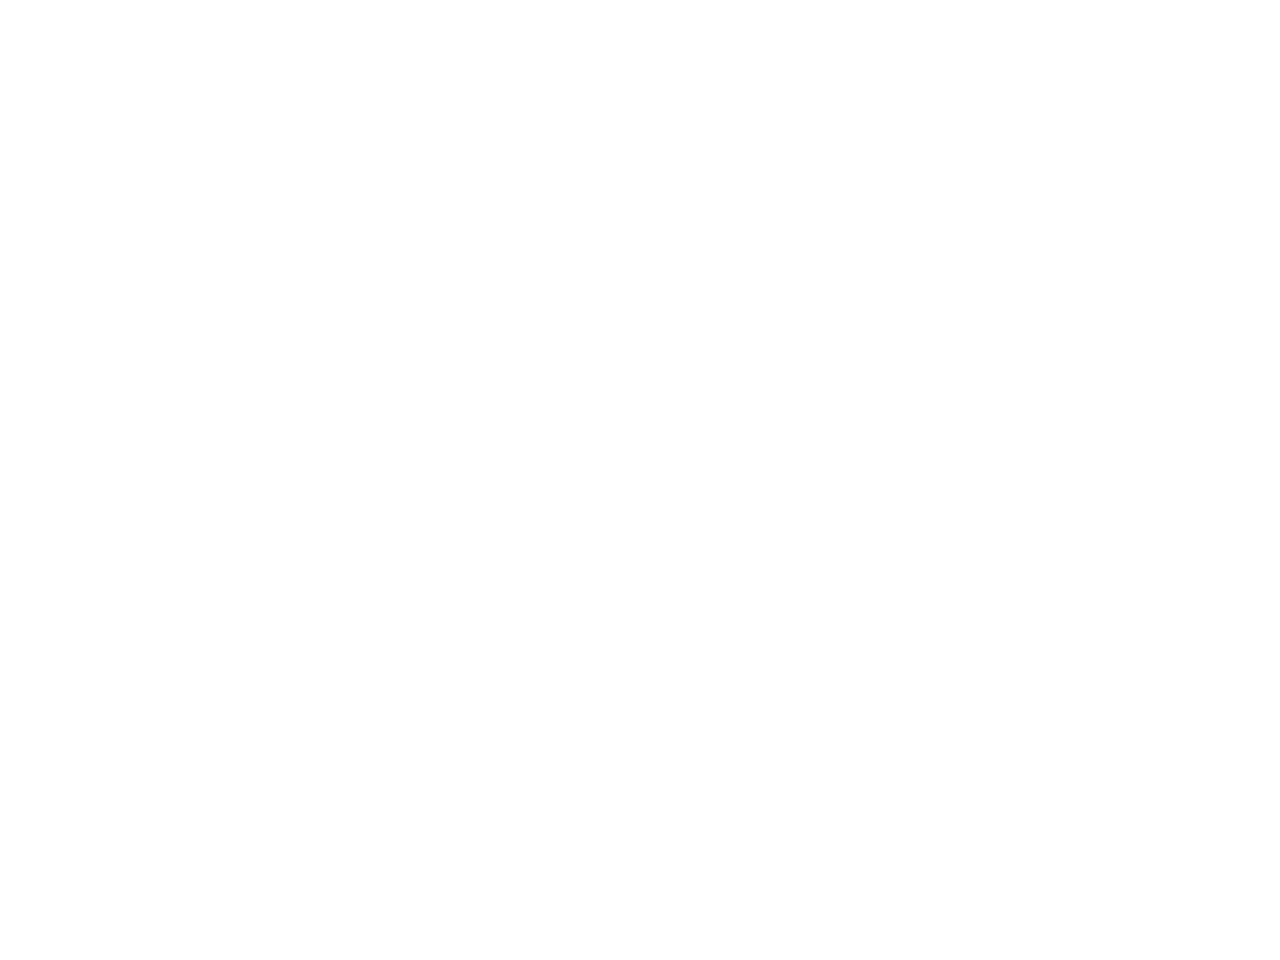

<IPython.core.display.Javascript object>


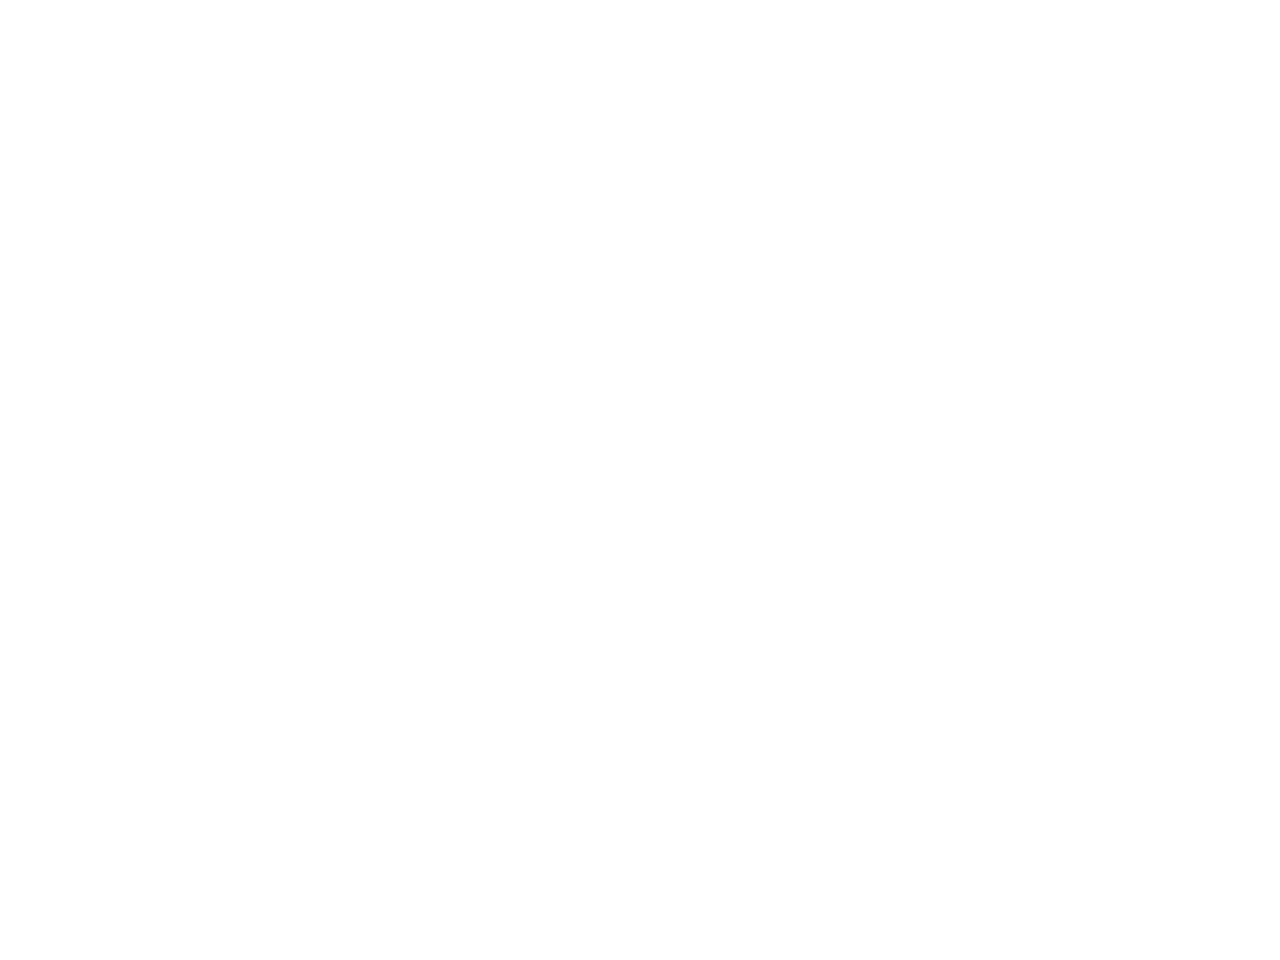

<IPython.core.display.Javascript object>


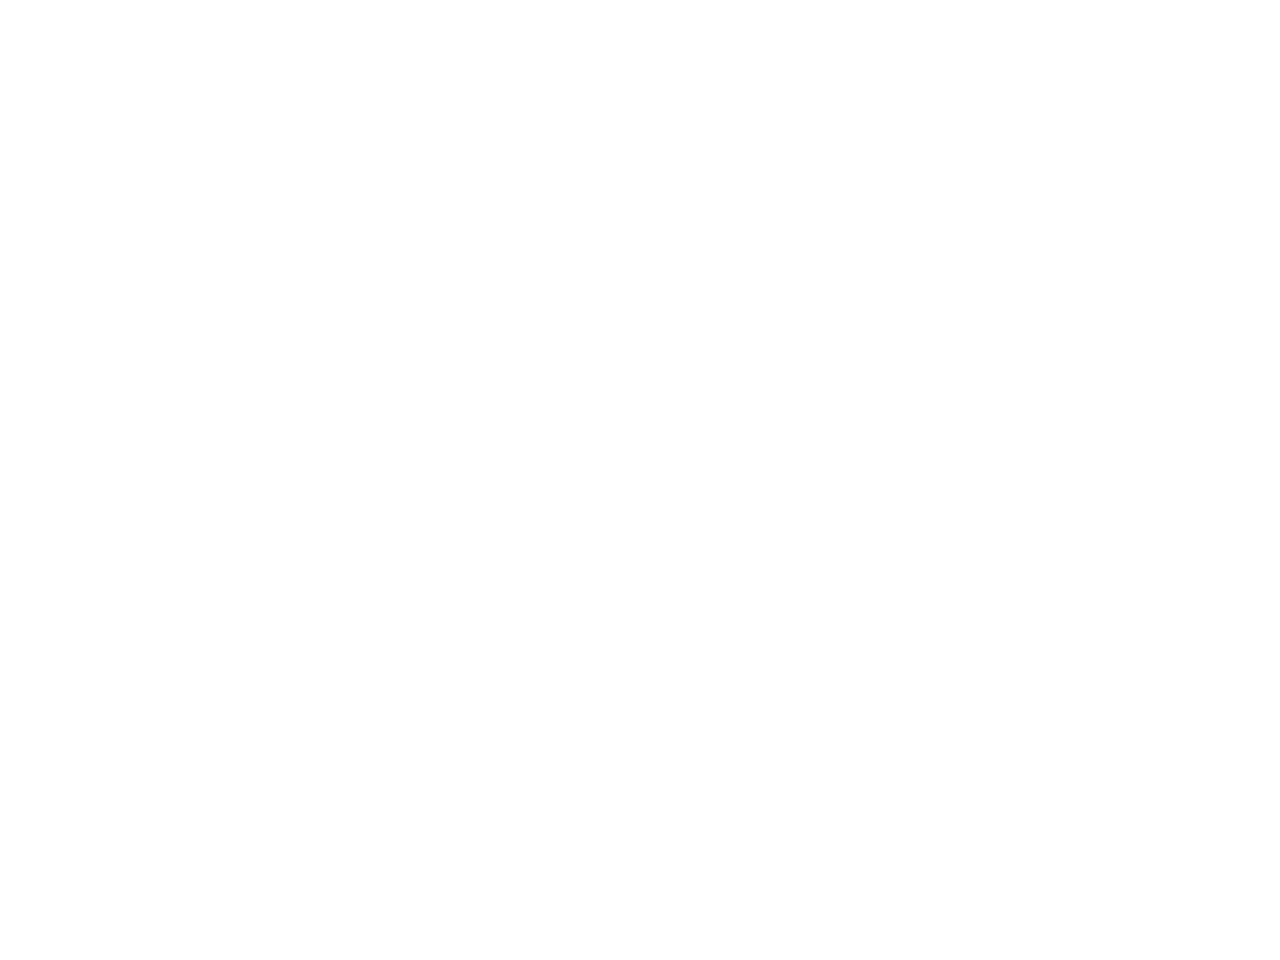

<IPython.core.display.Javascript object>


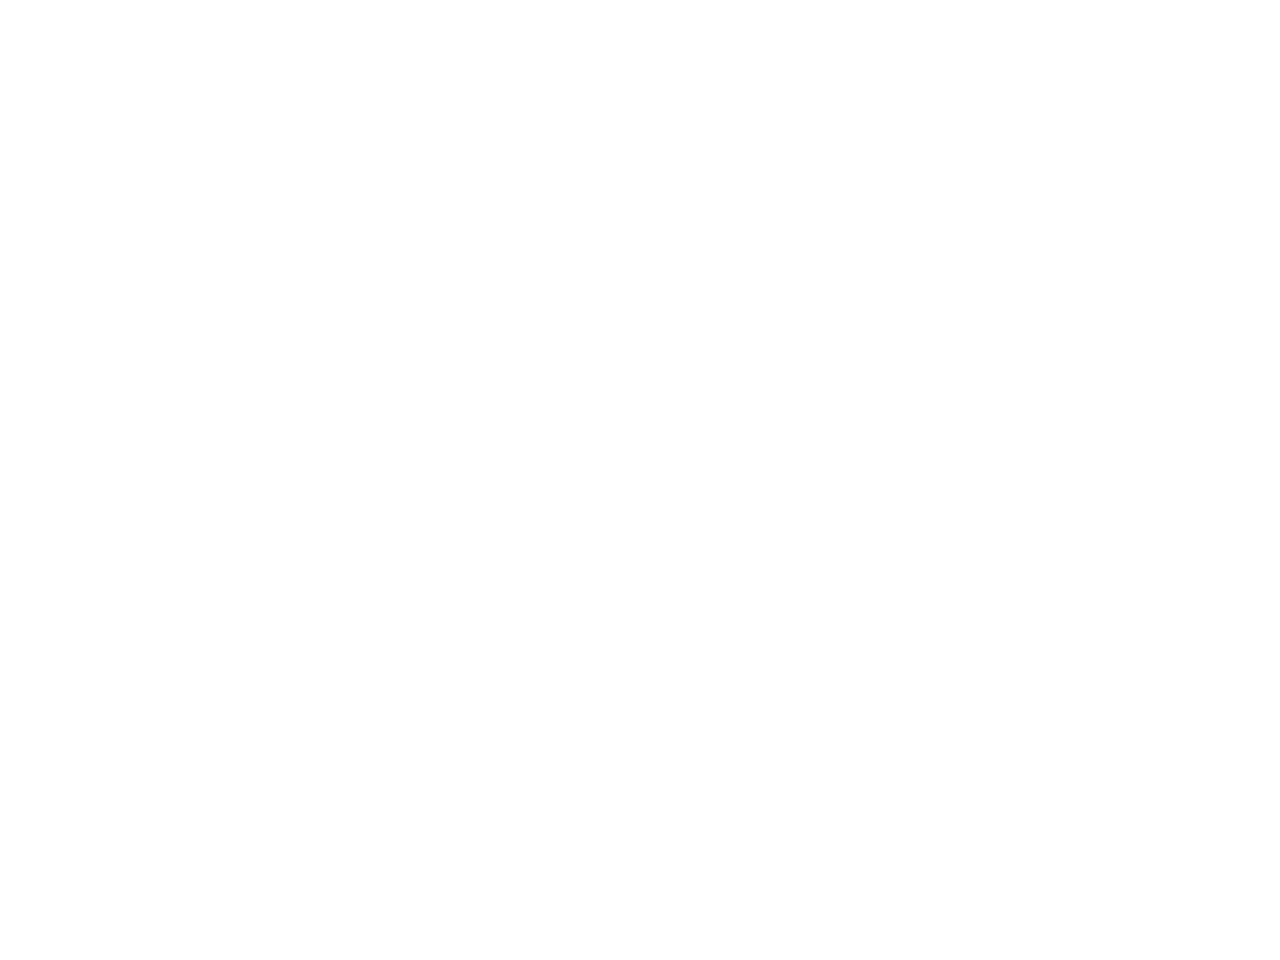

<IPython.core.display.Javascript object>


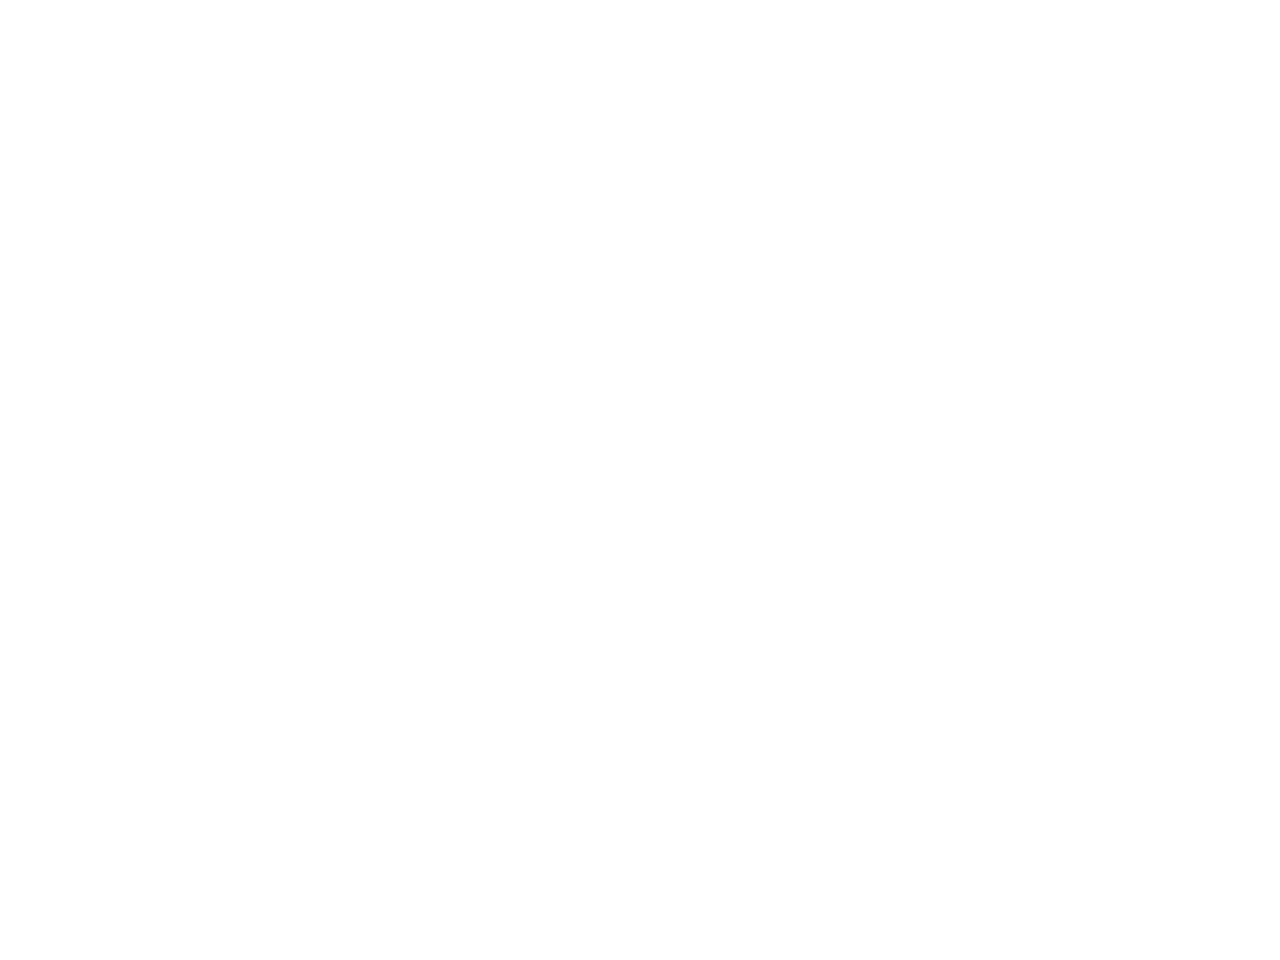

<IPython.core.display.Javascript object>


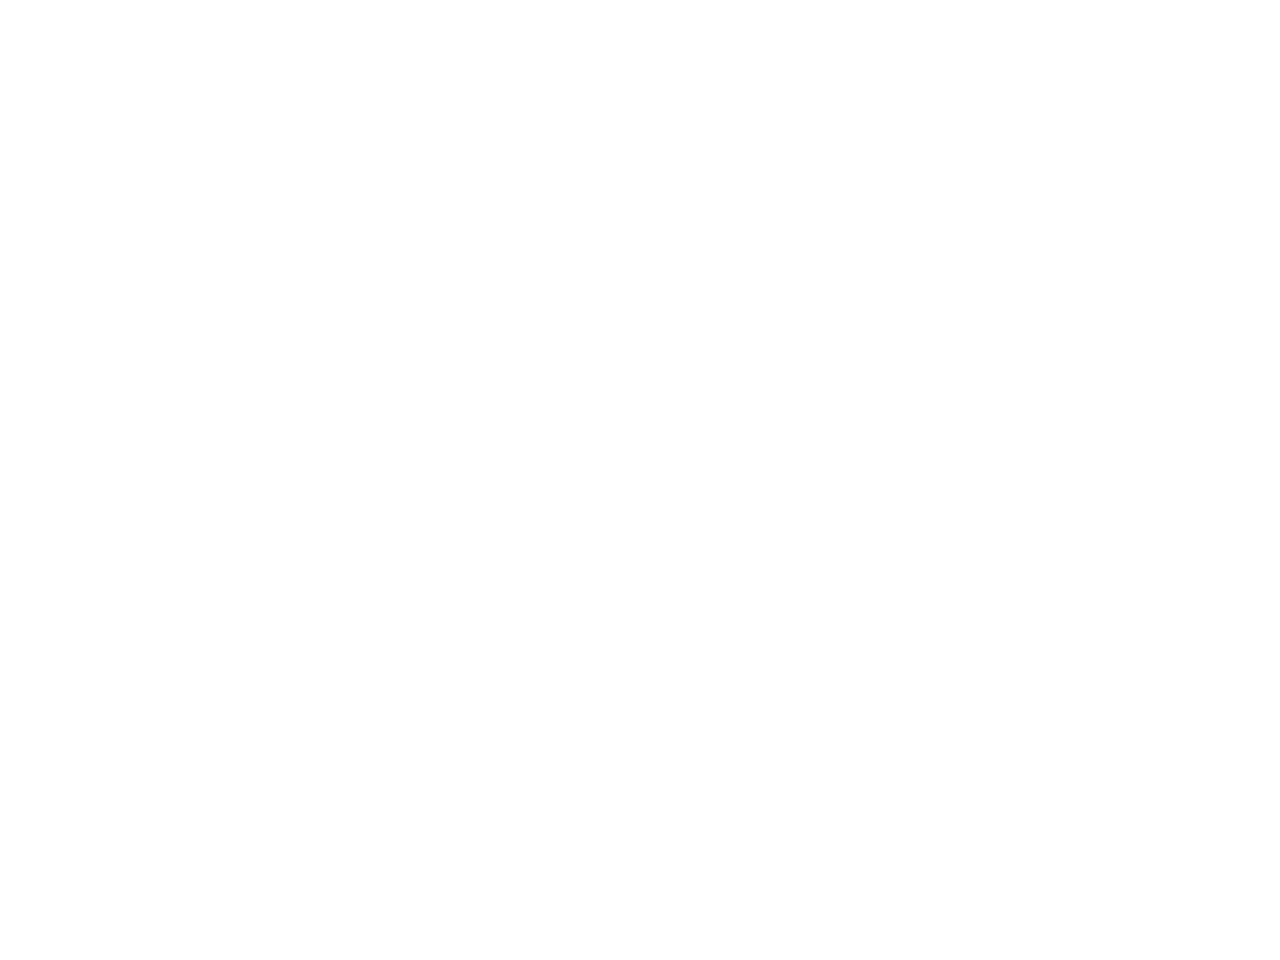

<IPython.core.display.Javascript object>


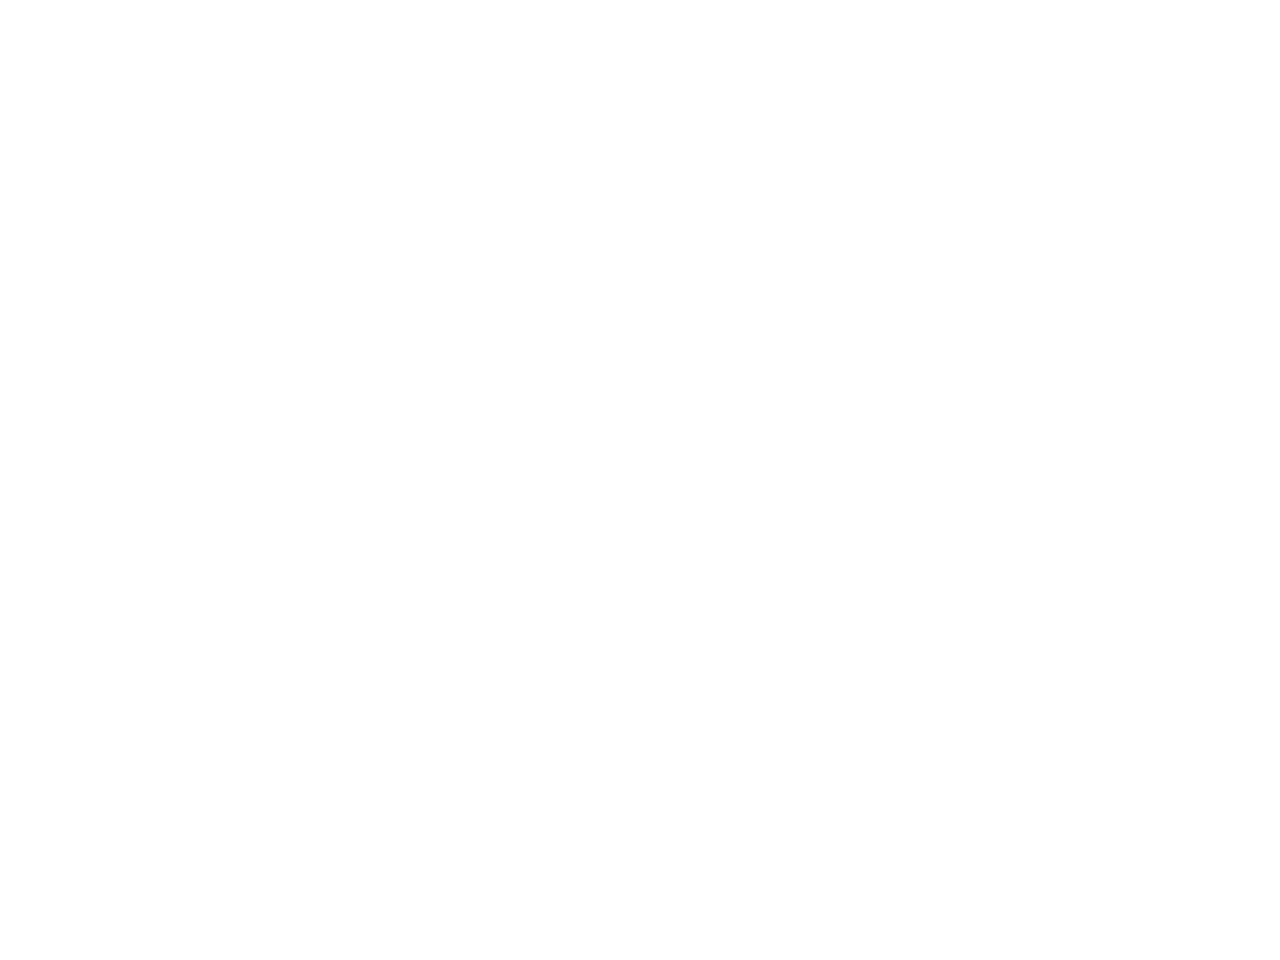

<IPython.core.display.Javascript object>


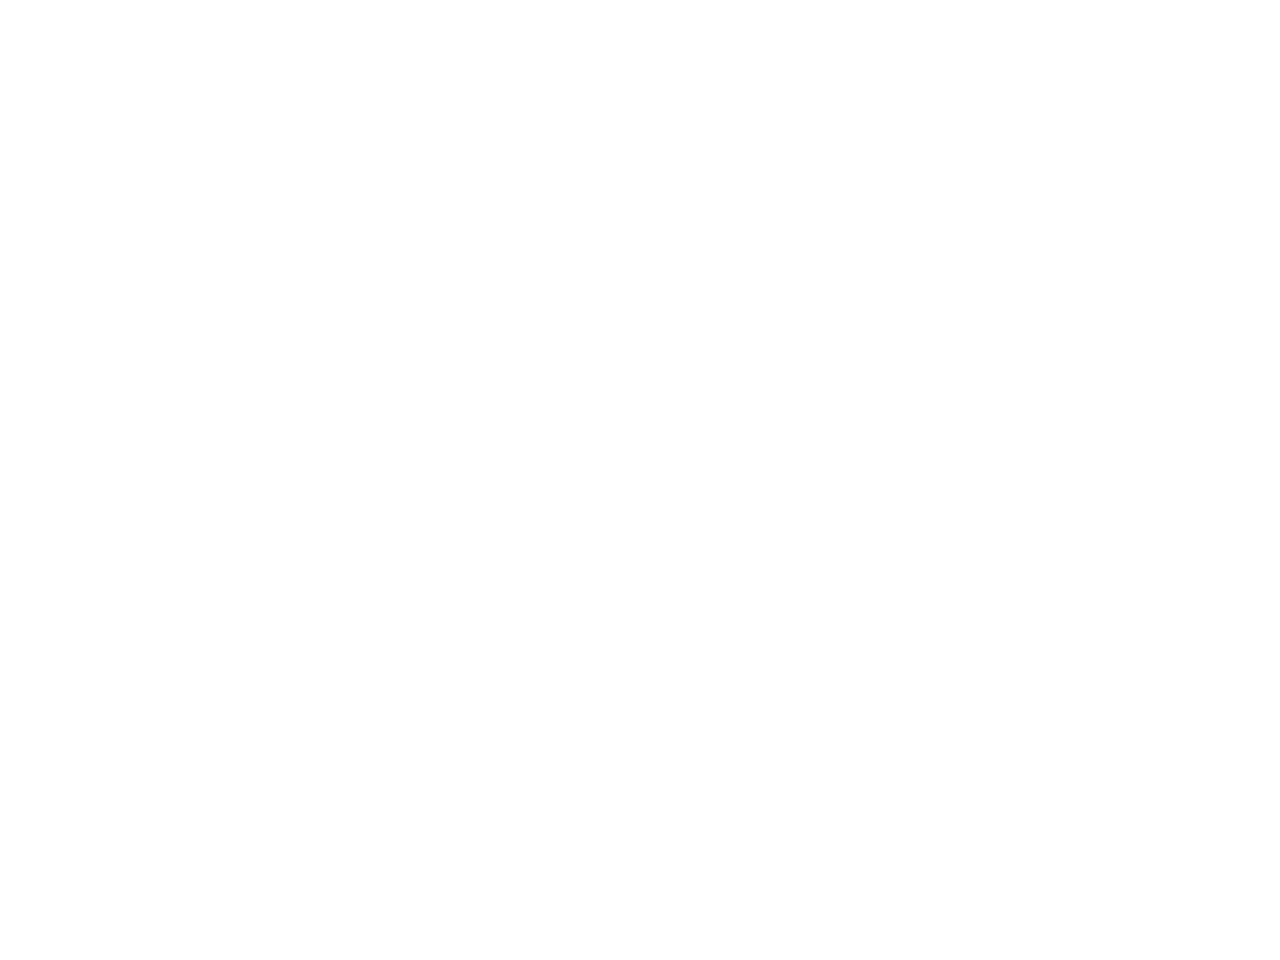

<IPython.core.display.Javascript object>


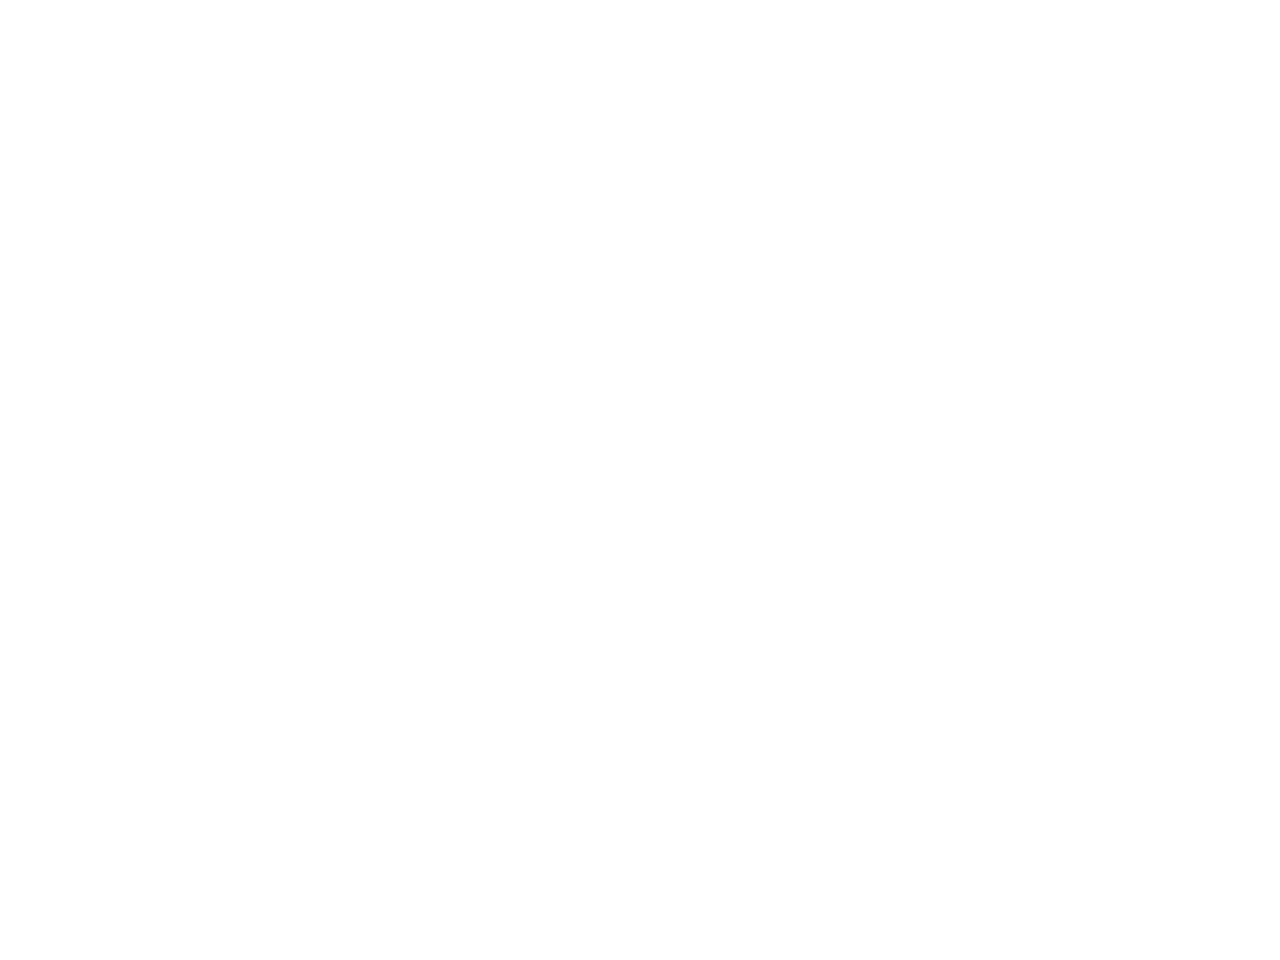

<IPython.core.display.Javascript object>


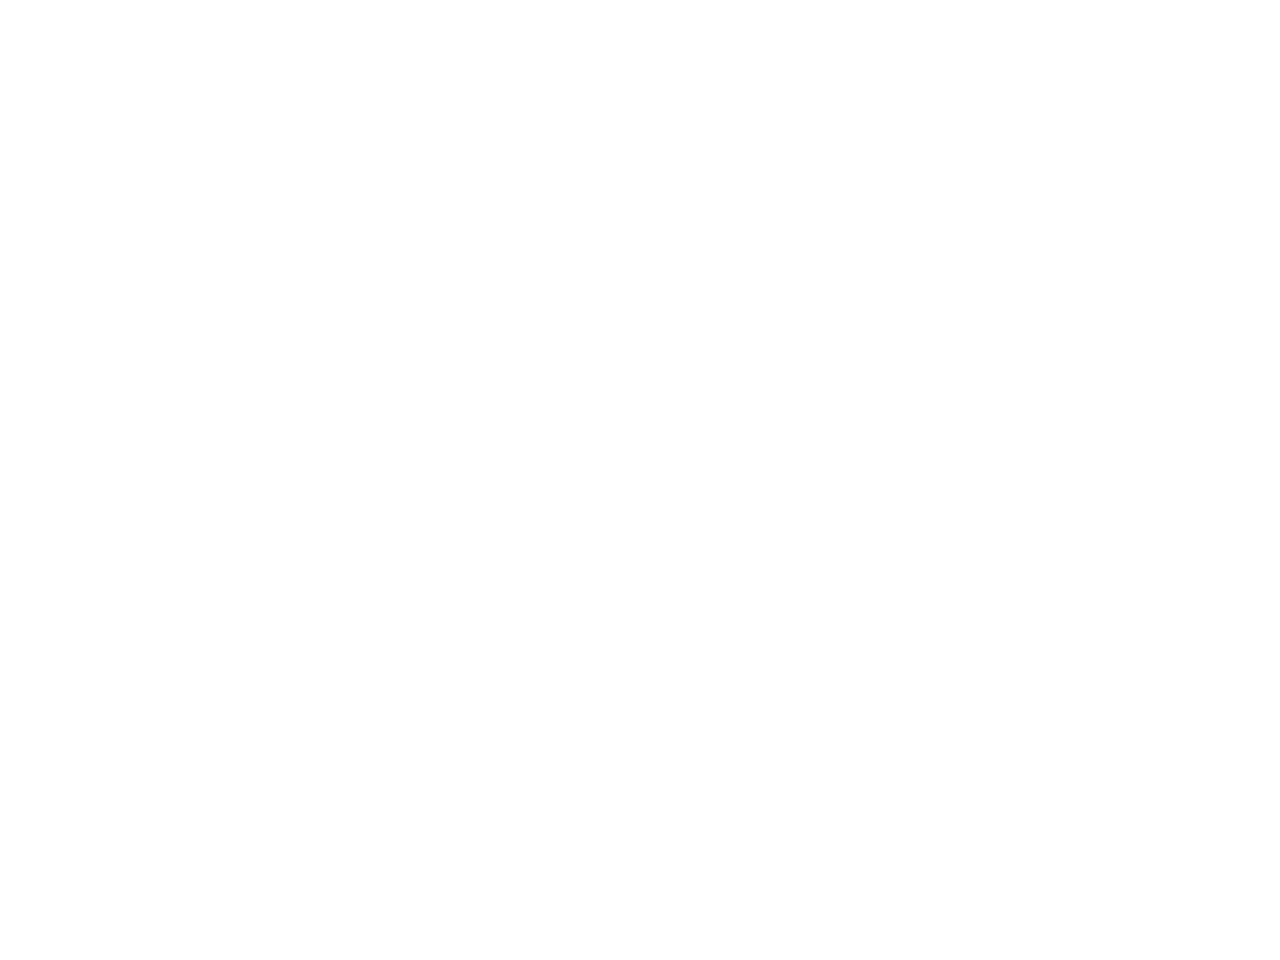

<IPython.core.display.Javascript object>


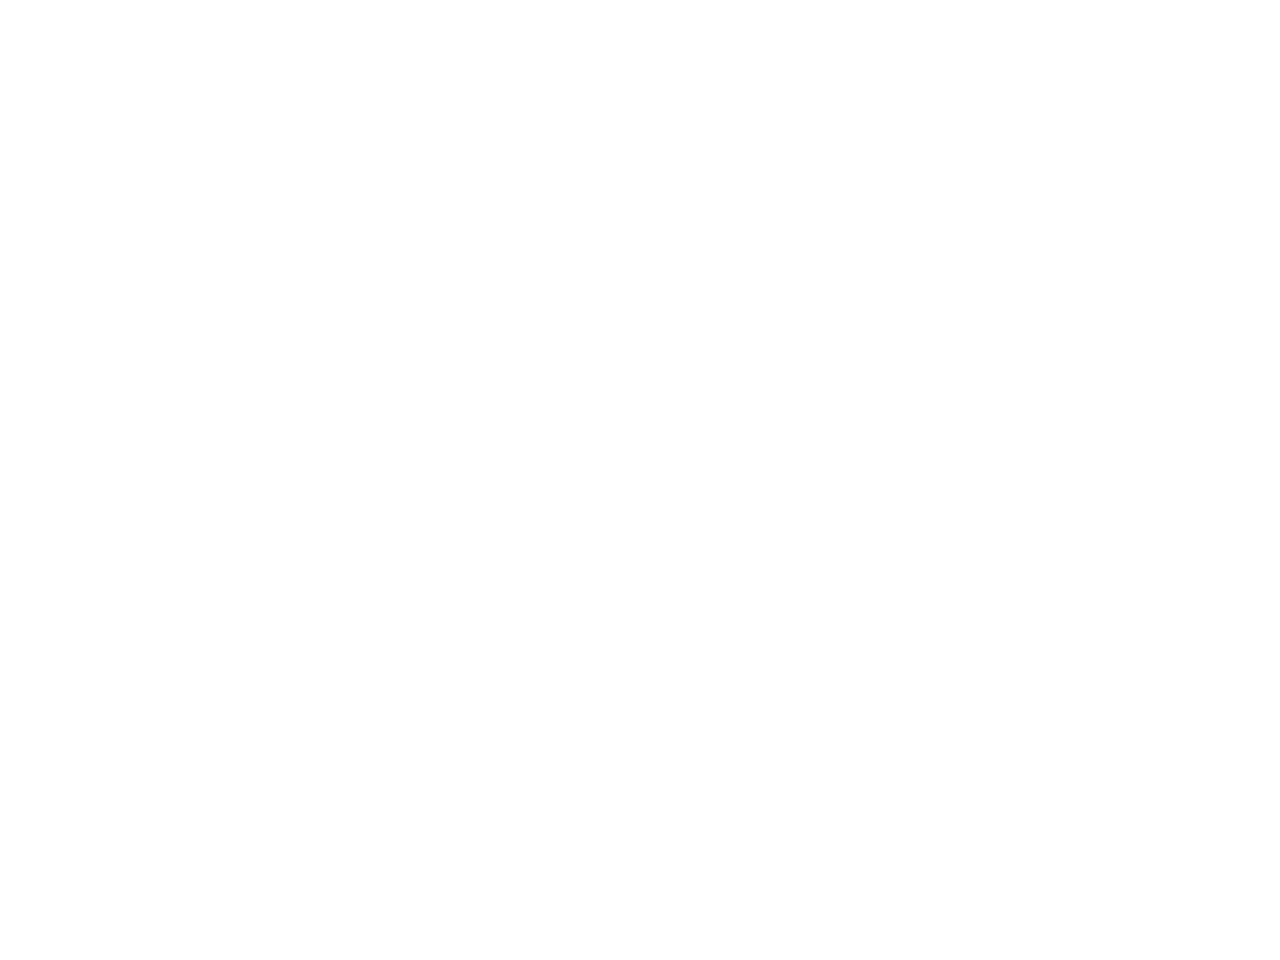

<IPython.core.display.Javascript object>


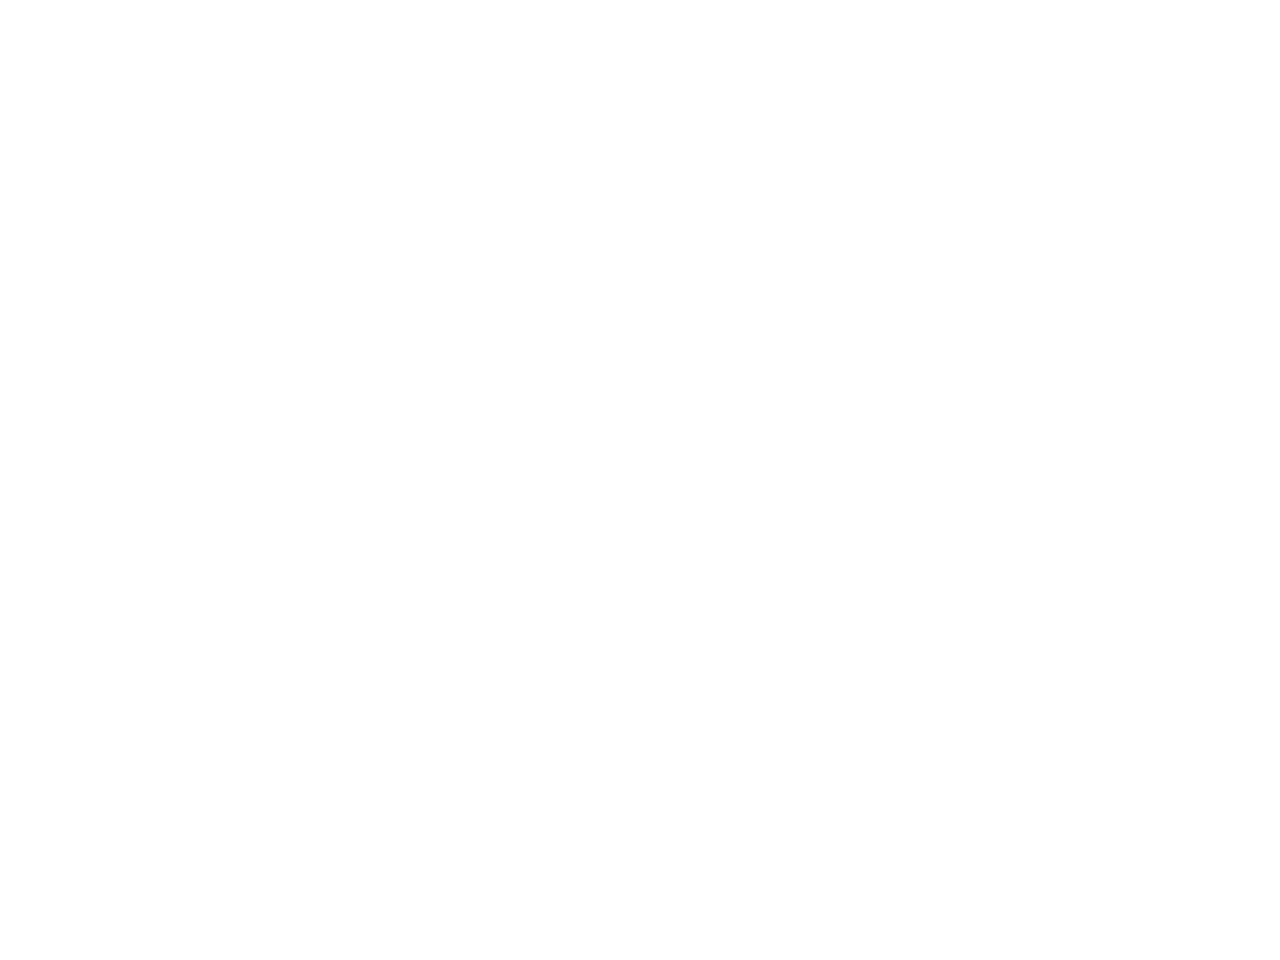

<IPython.core.display.Javascript object>


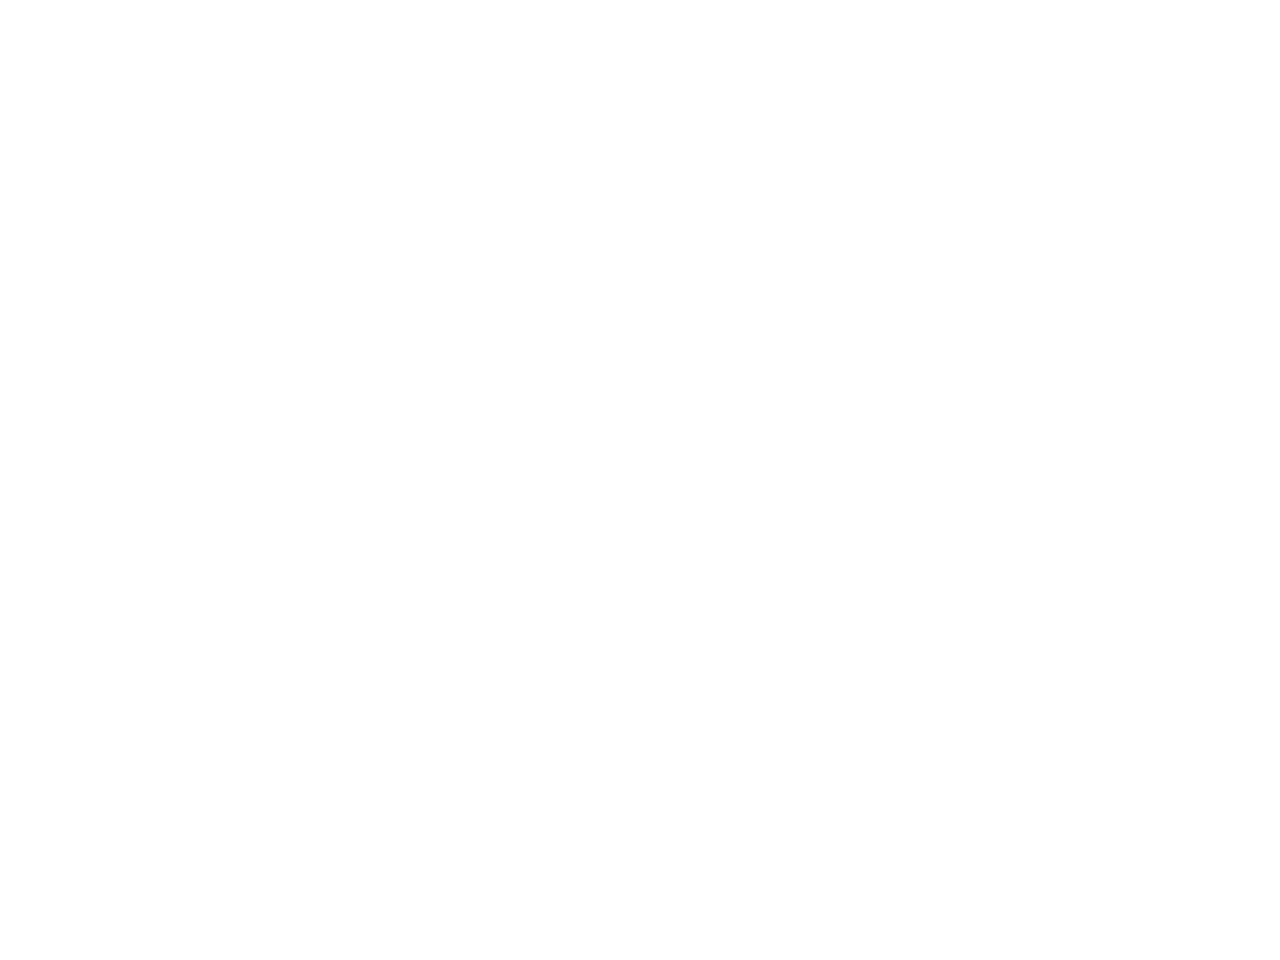

<IPython.core.display.Javascript object>


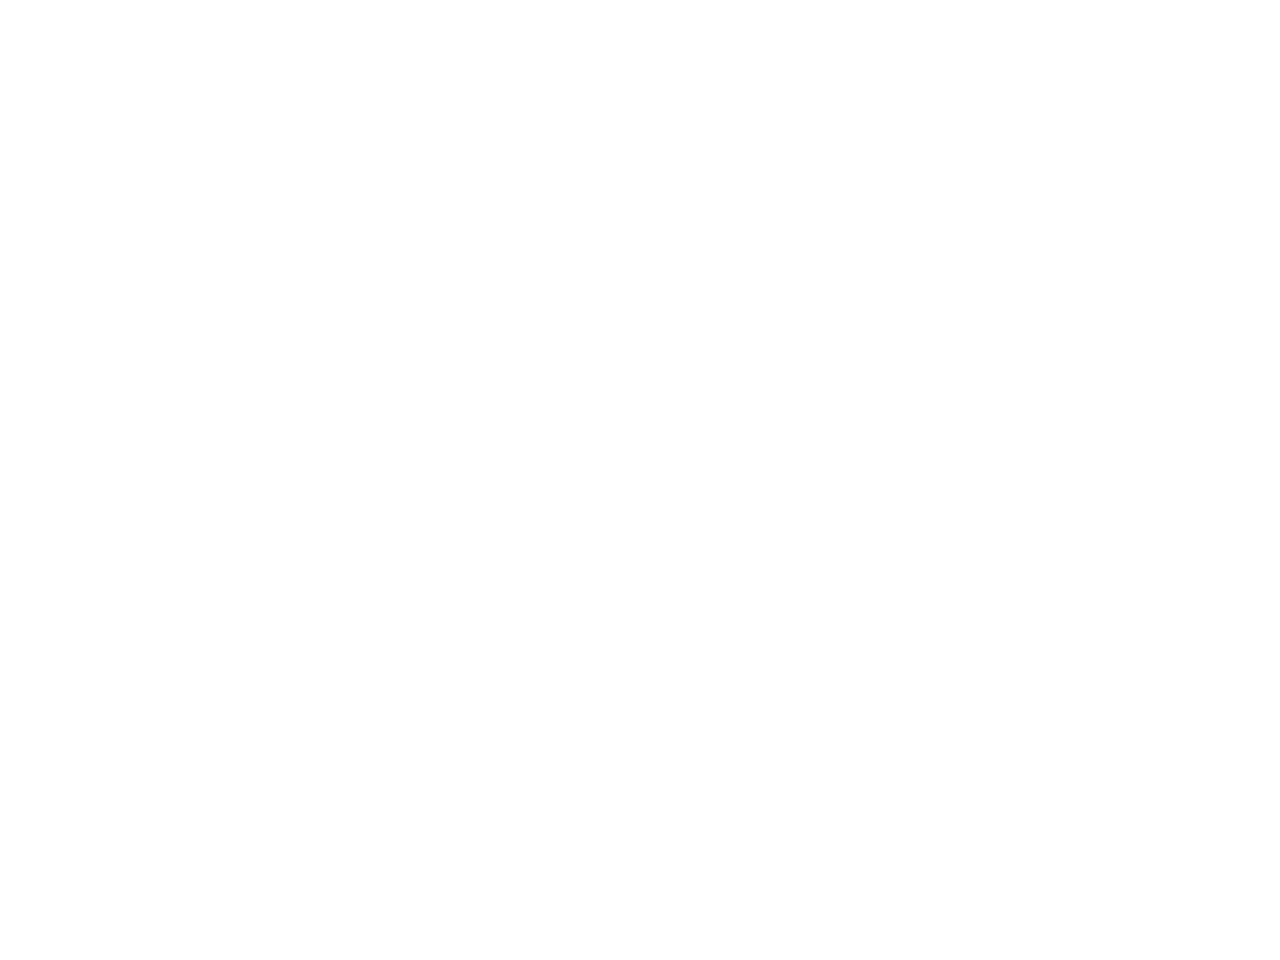

<IPython.core.display.Javascript object>


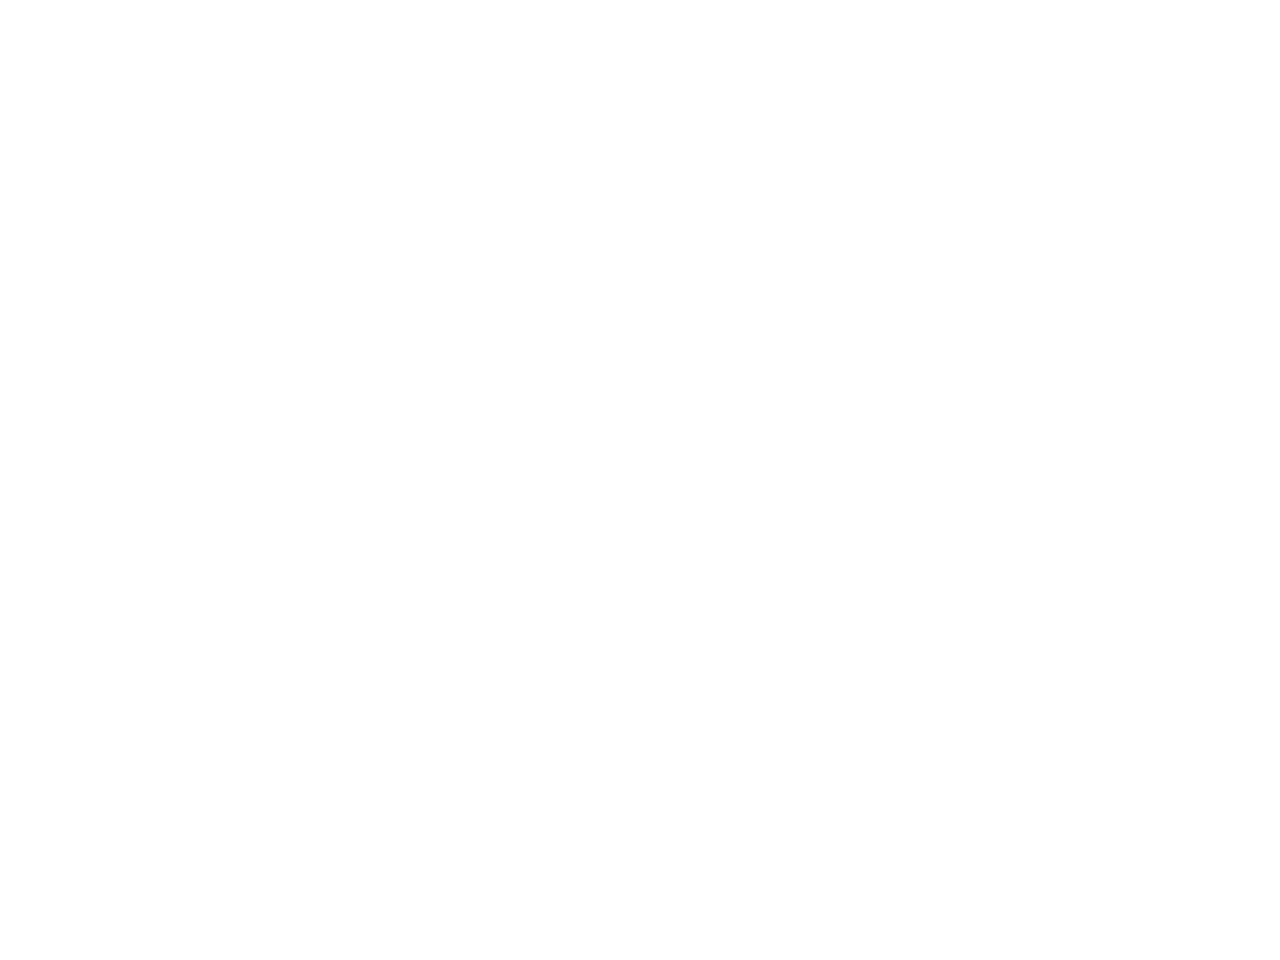

<IPython.core.display.Javascript object>


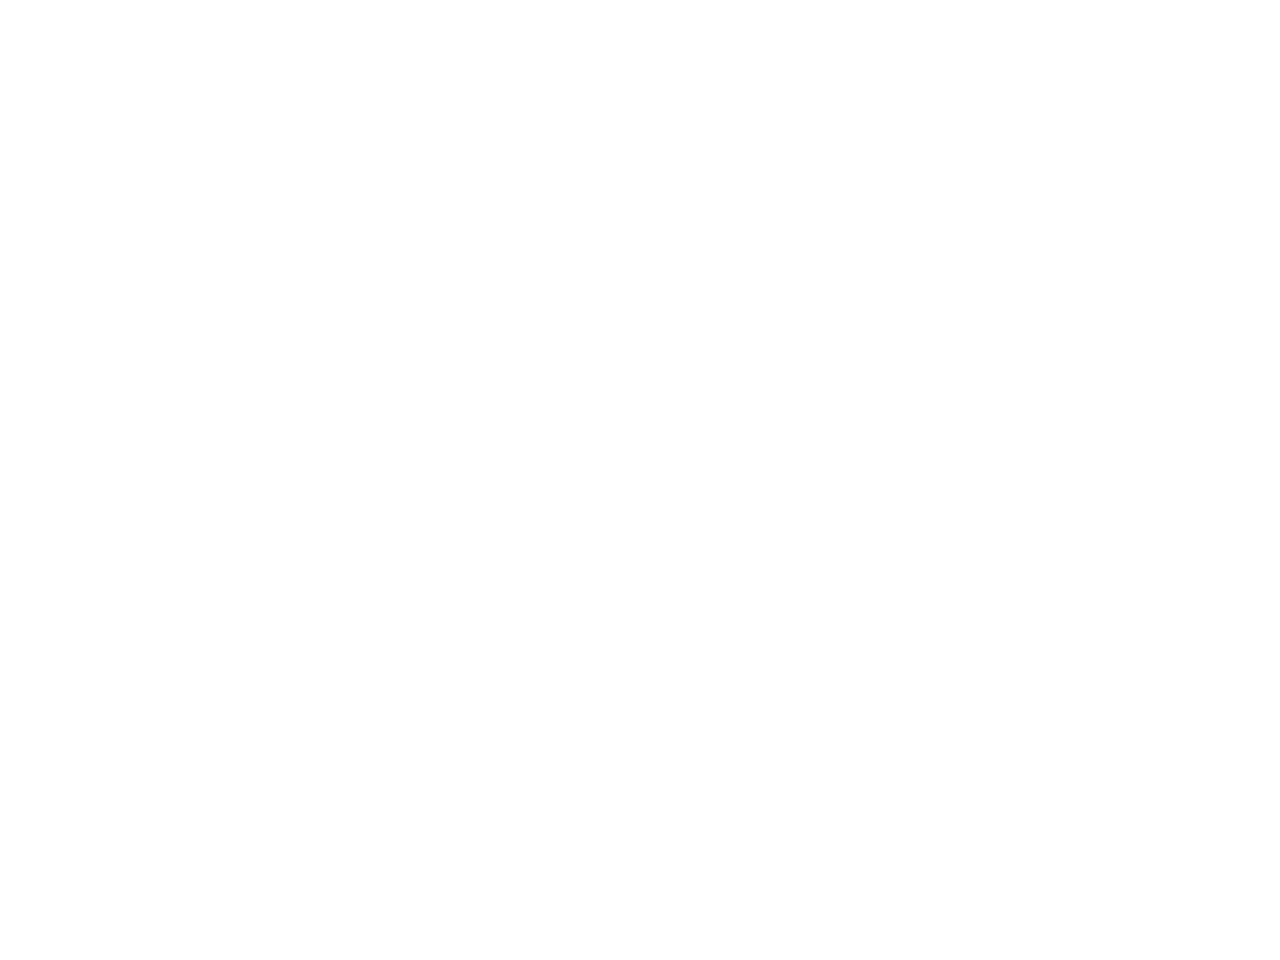

<IPython.core.display.Javascript object>


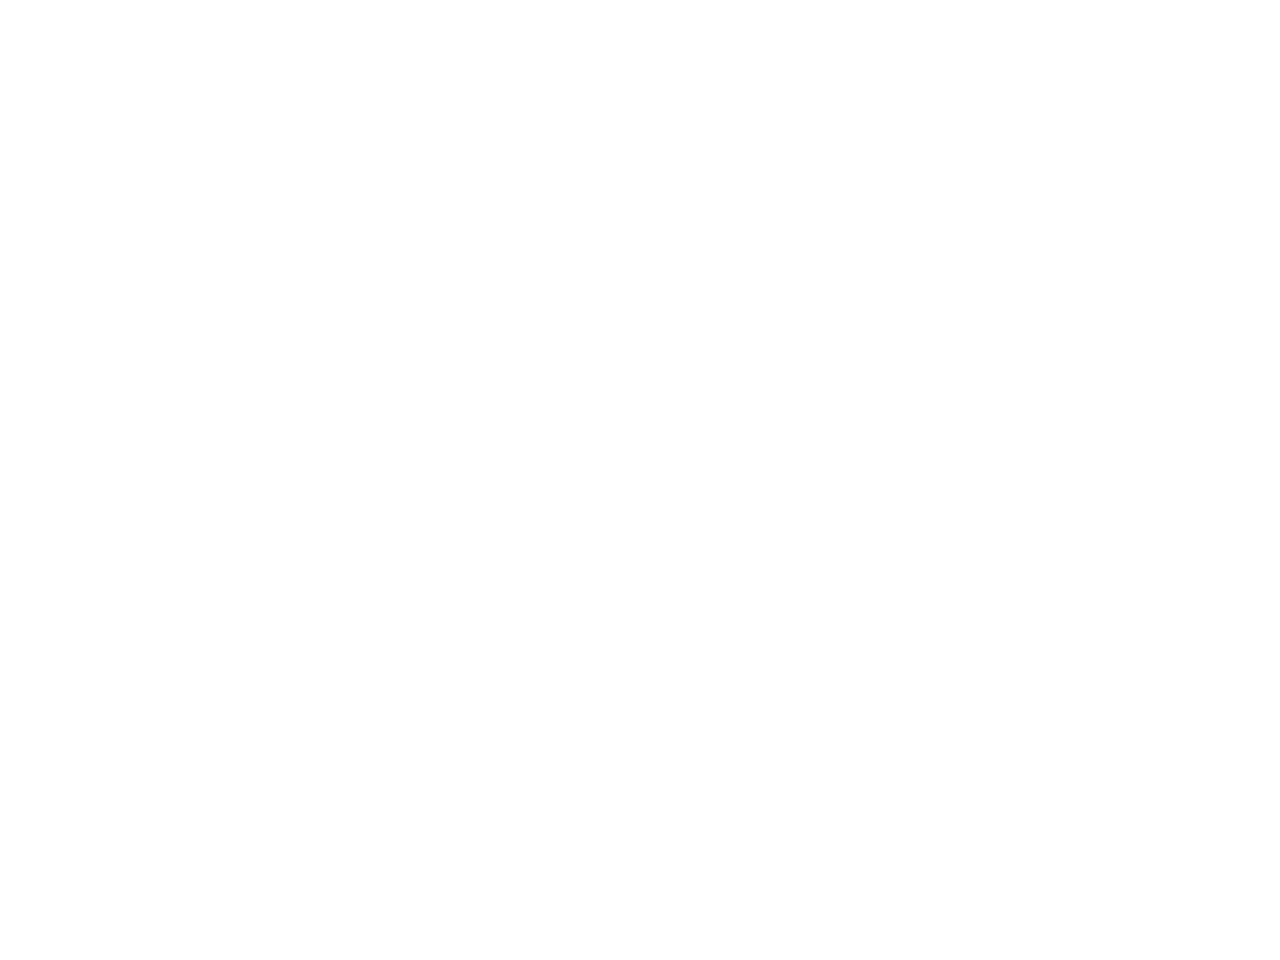

<IPython.core.display.Javascript object>


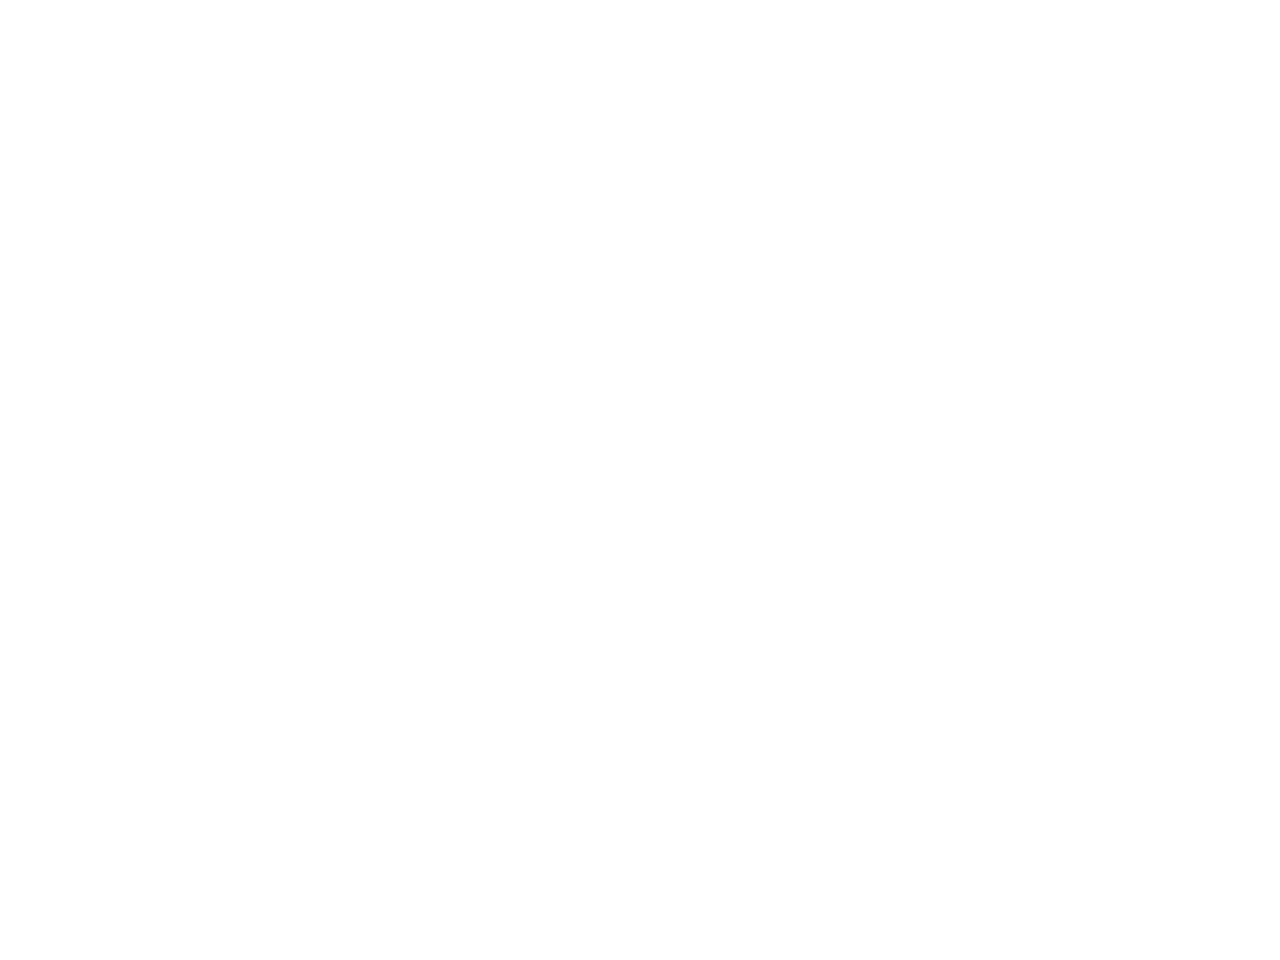

<IPython.core.display.Javascript object>


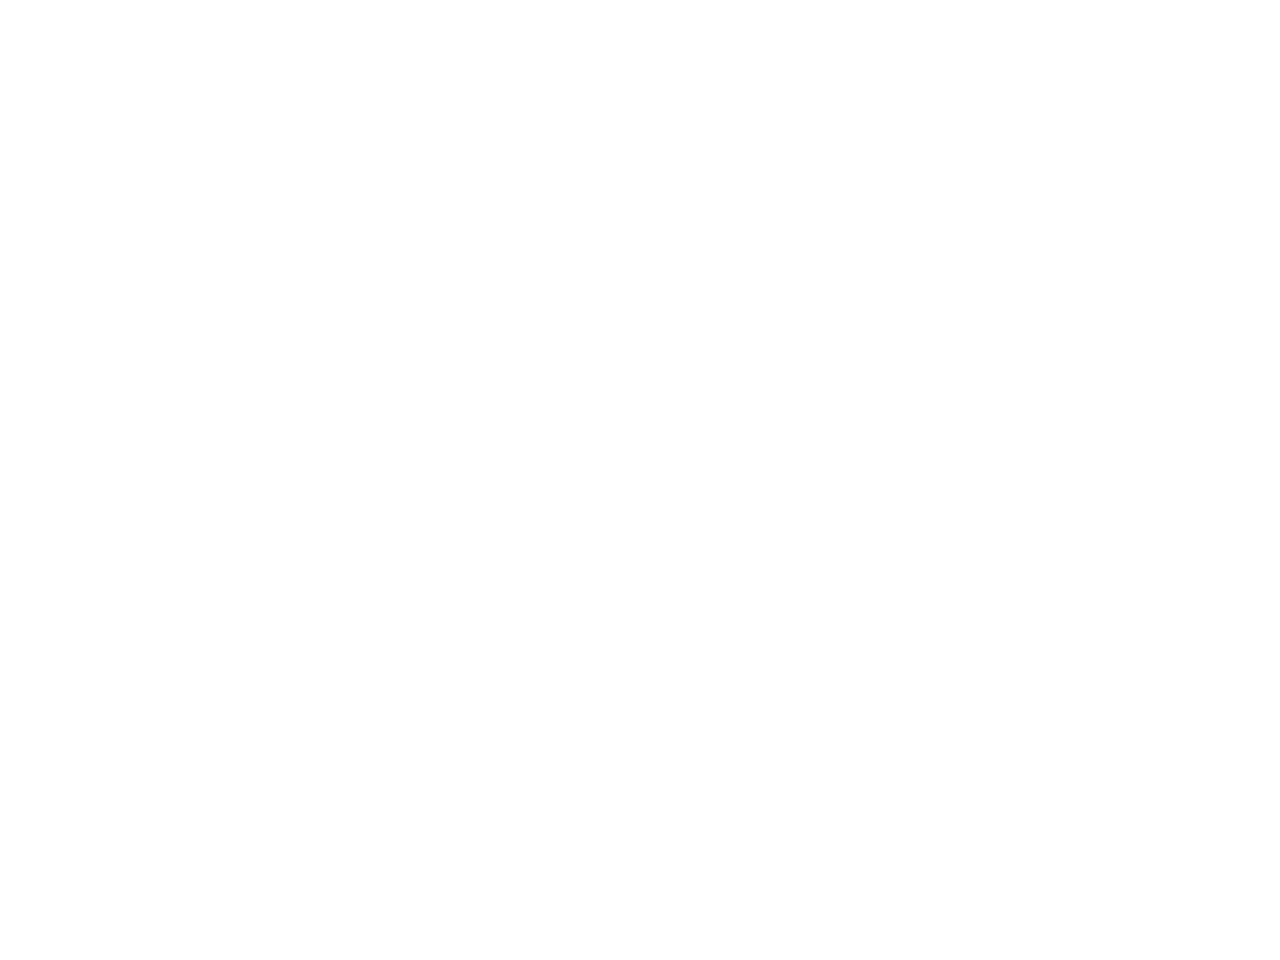

<IPython.core.display.Javascript object>


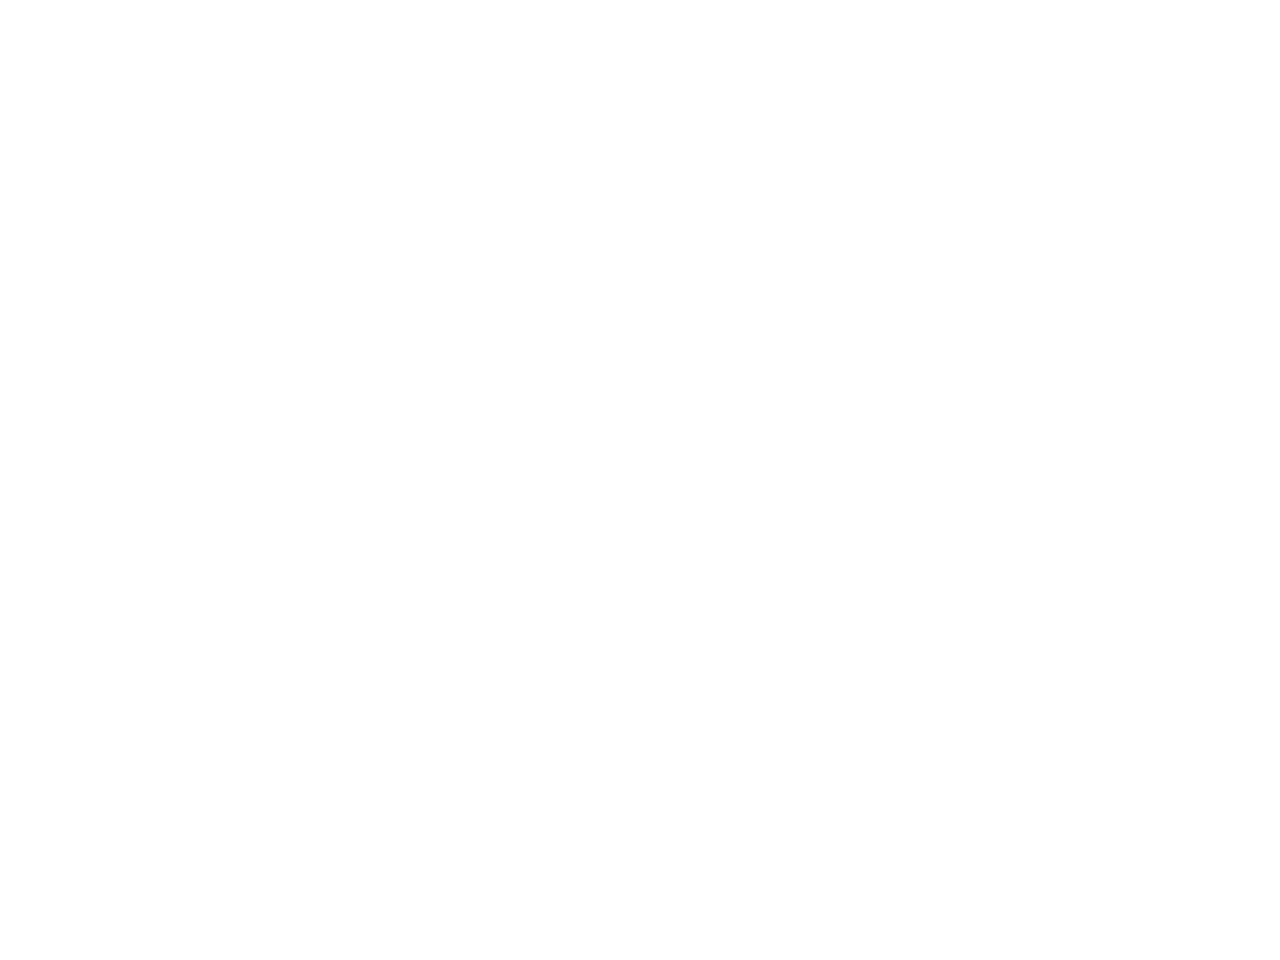

<IPython.core.display.Javascript object>


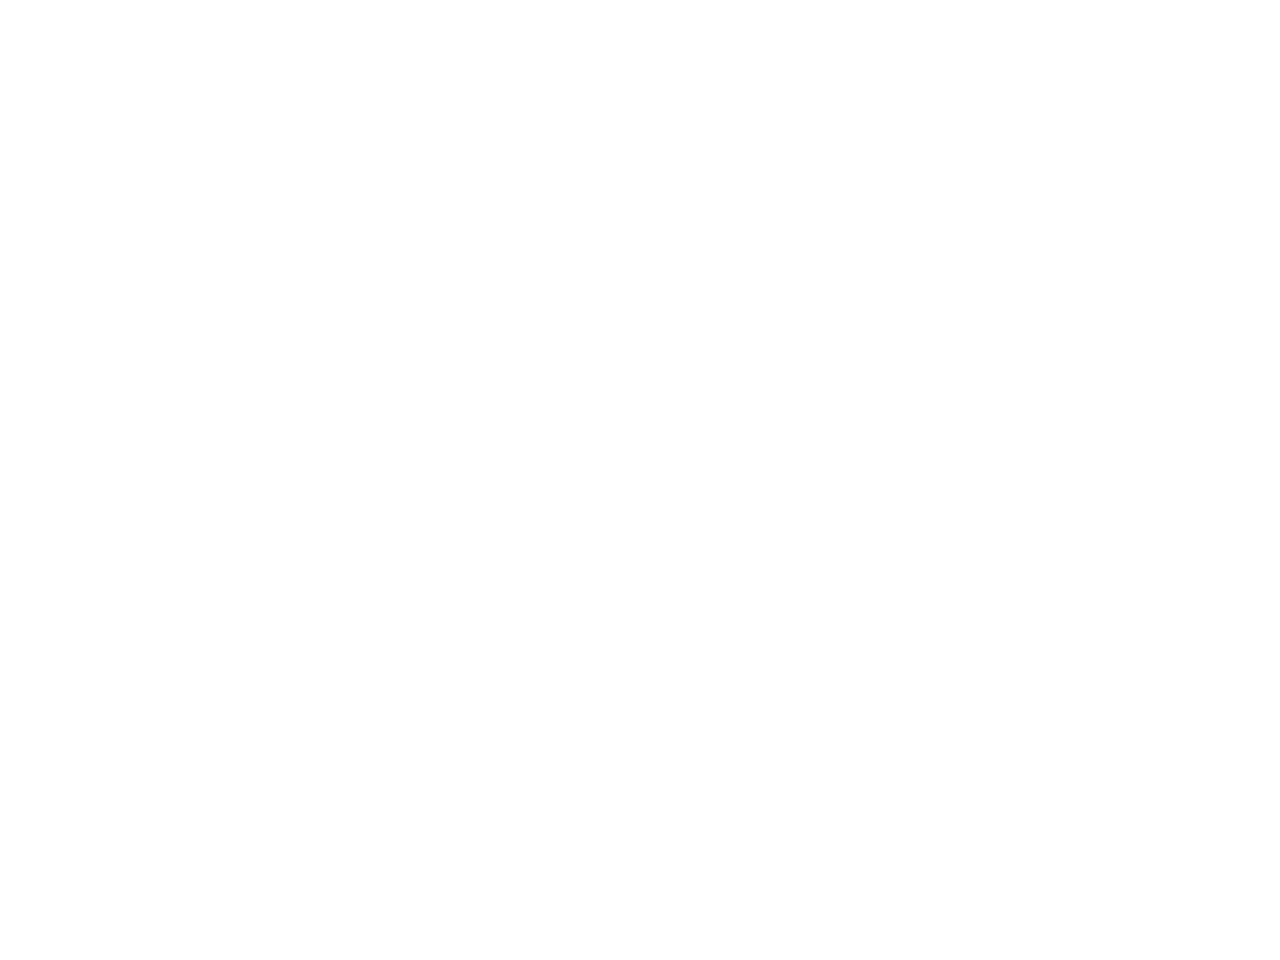

<IPython.core.display.Javascript object>


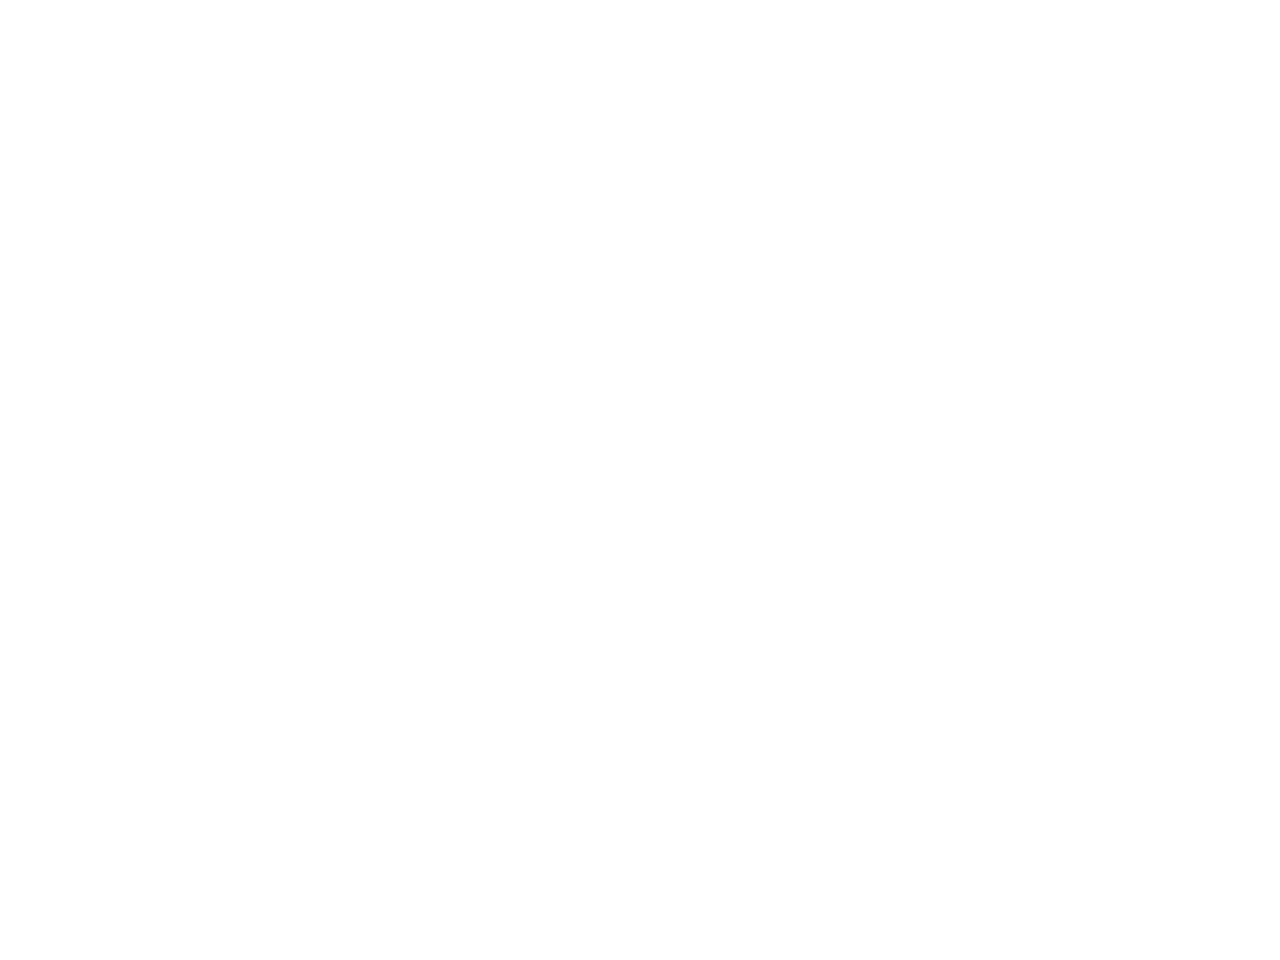

<IPython.core.display.Javascript object>


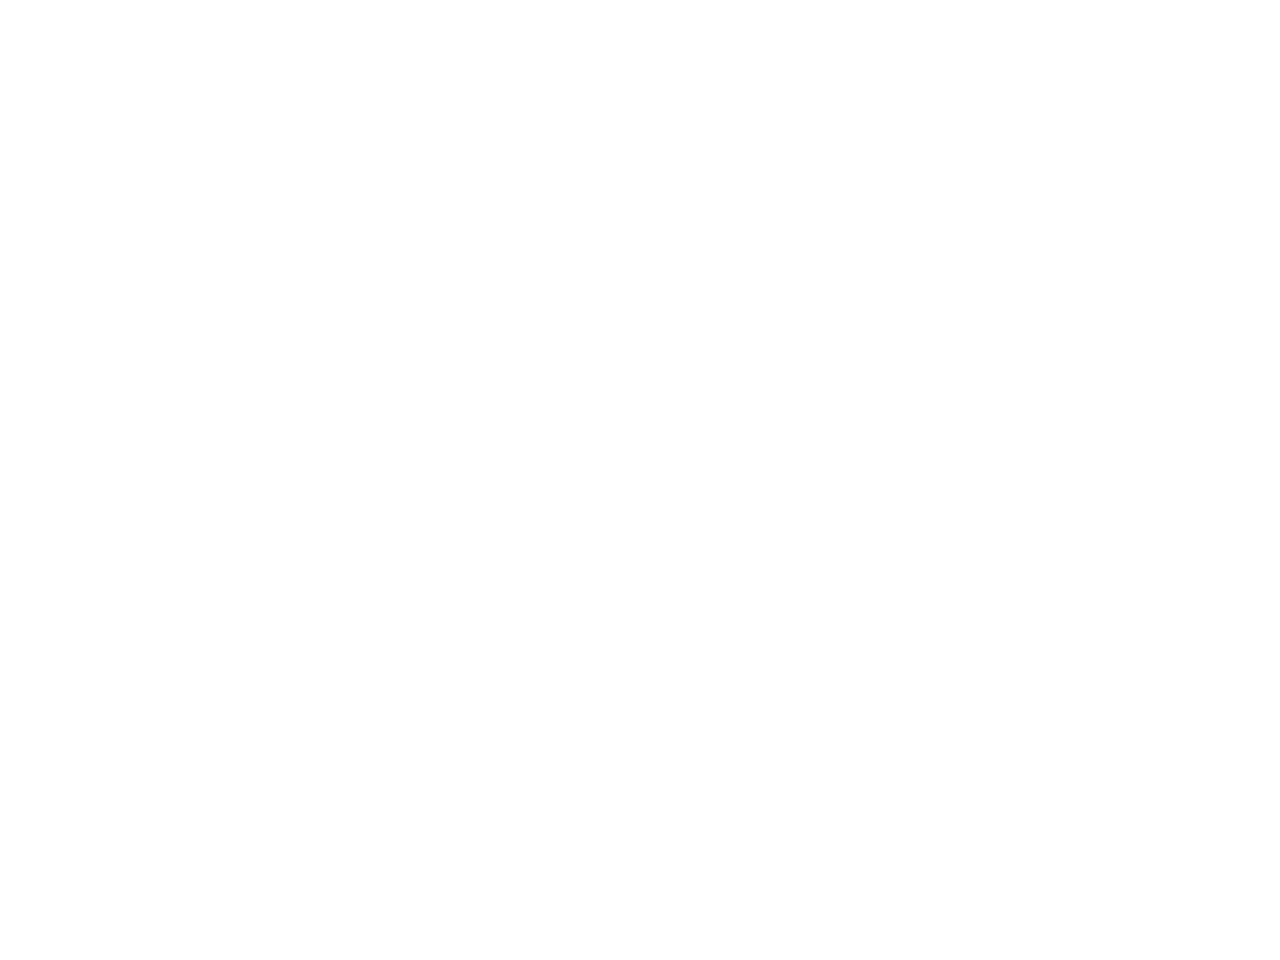

<IPython.core.display.Javascript object>


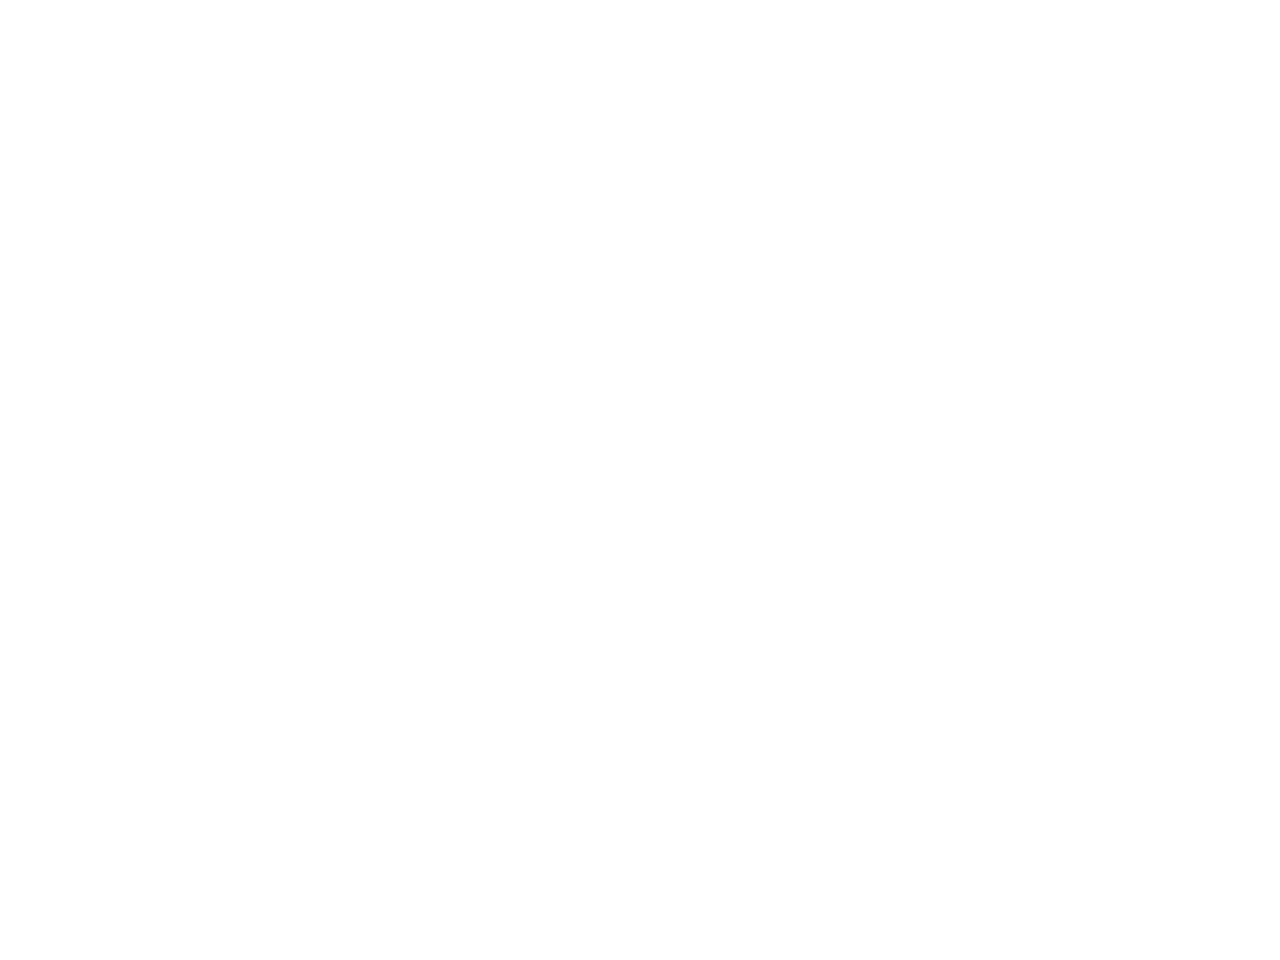

<IPython.core.display.Javascript object>


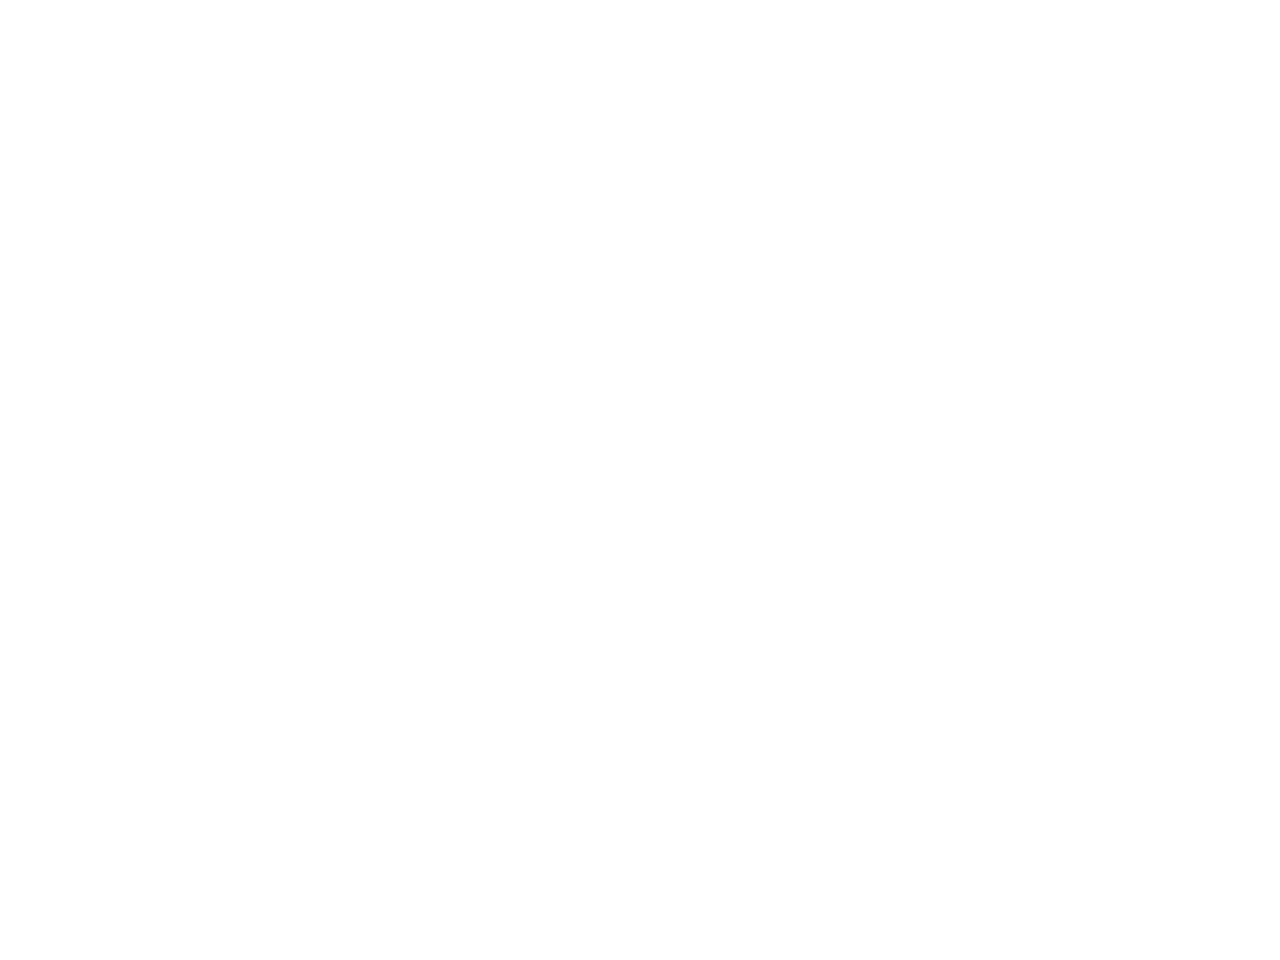

<IPython.core.display.Javascript object>


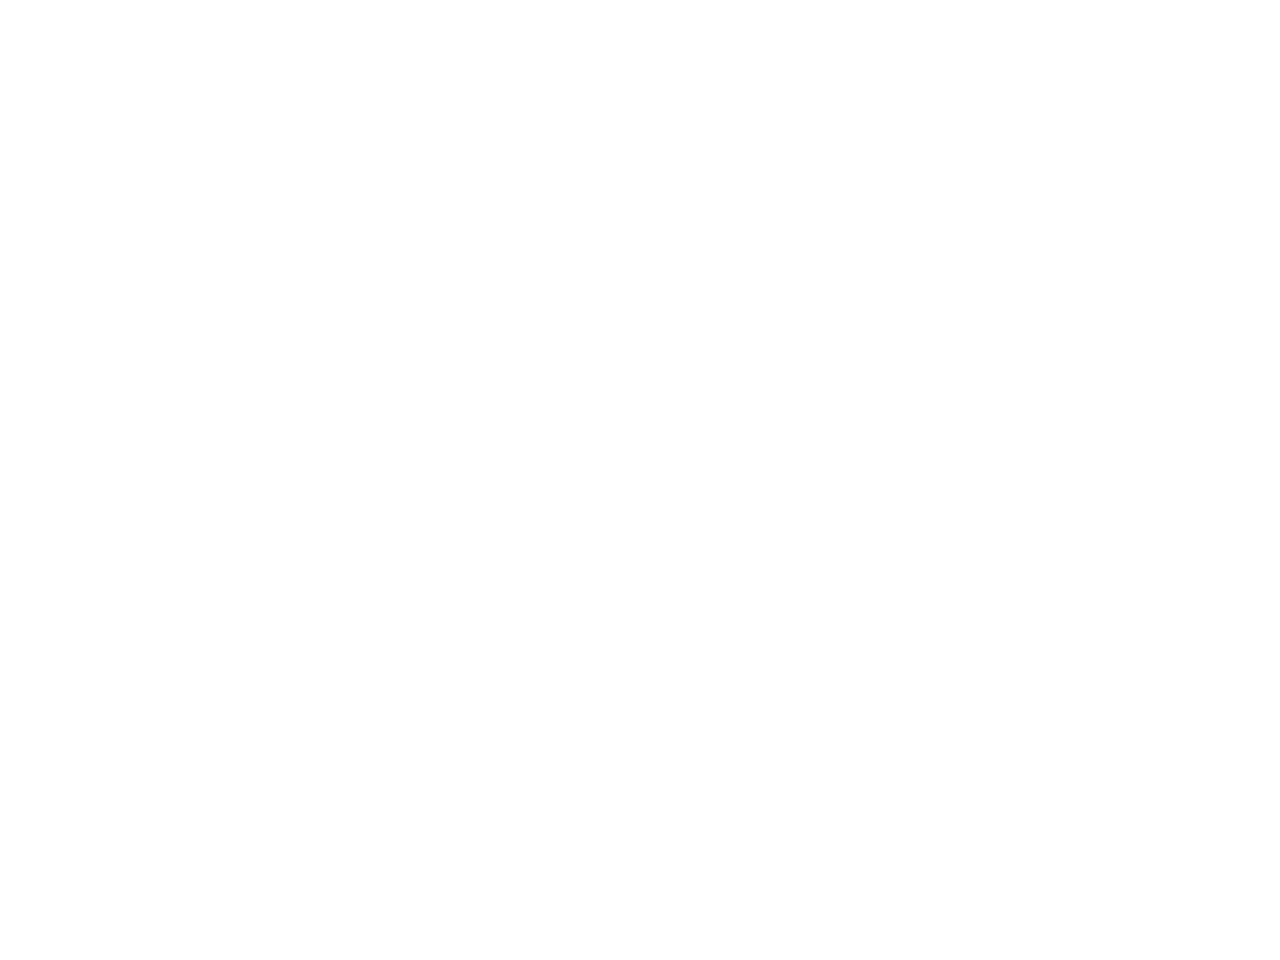

<IPython.core.display.Javascript object>


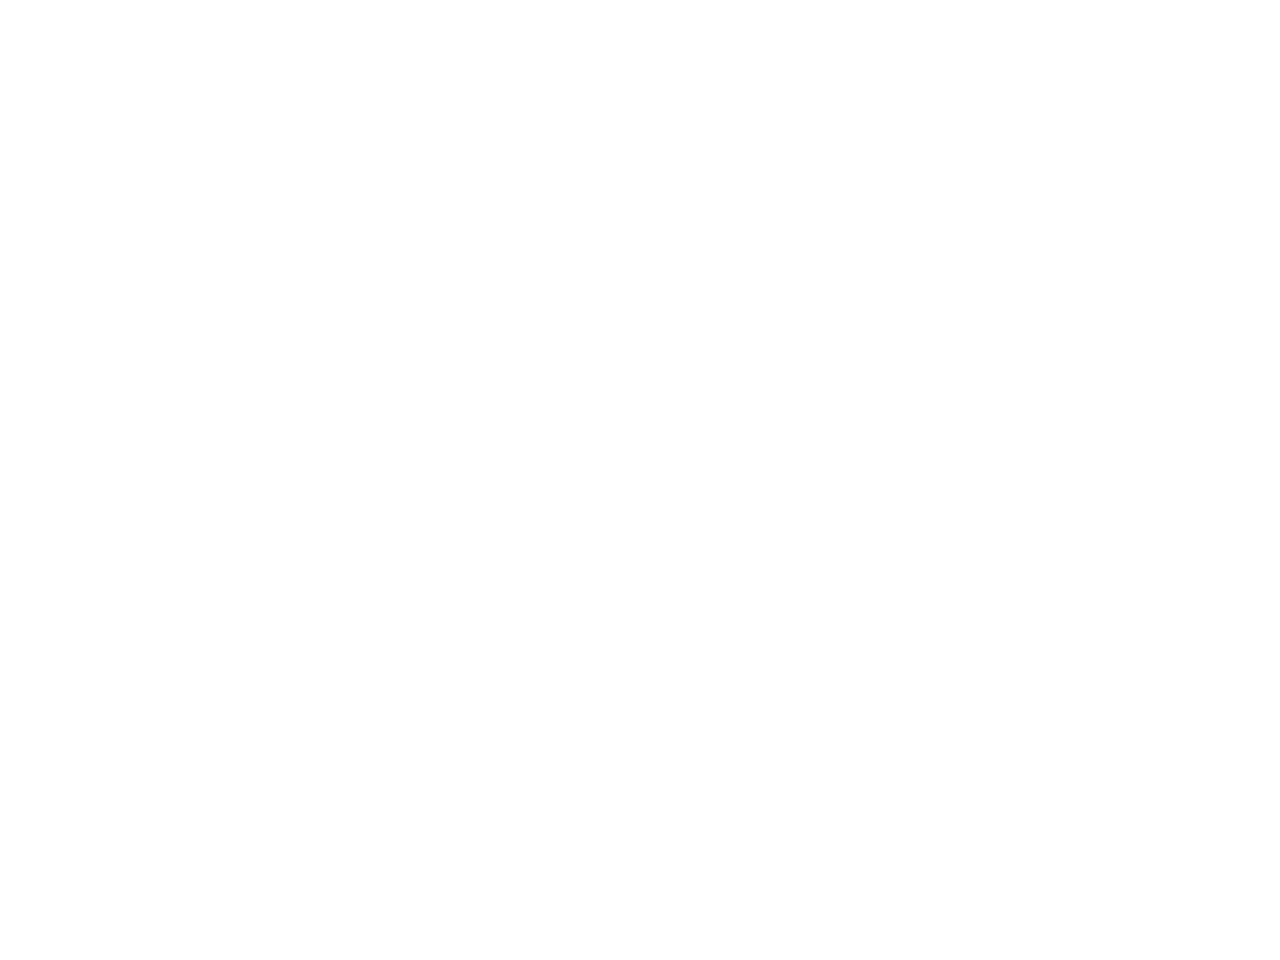

<IPython.core.display.Javascript object>


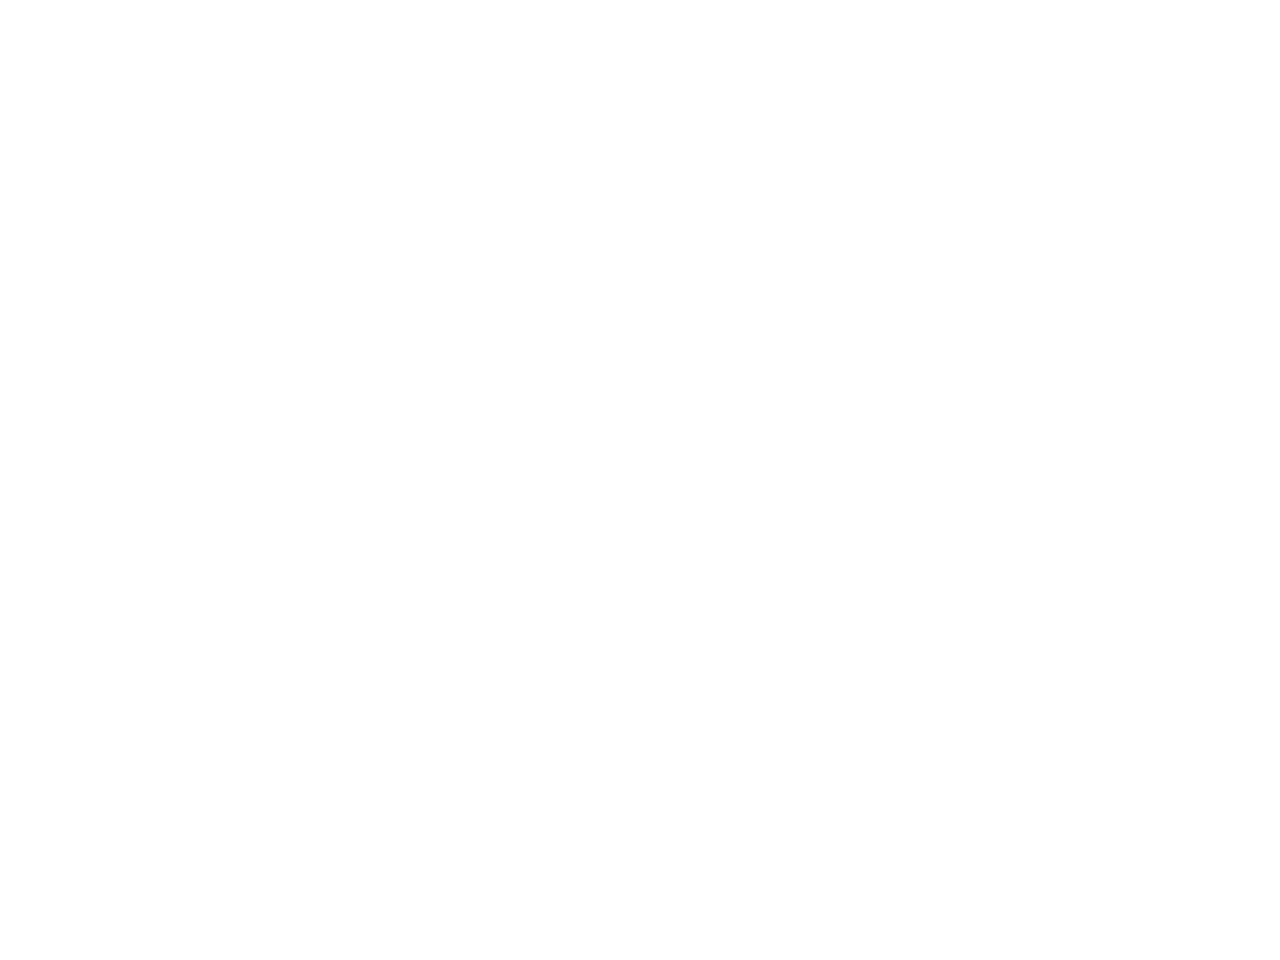

<IPython.core.display.Javascript object>


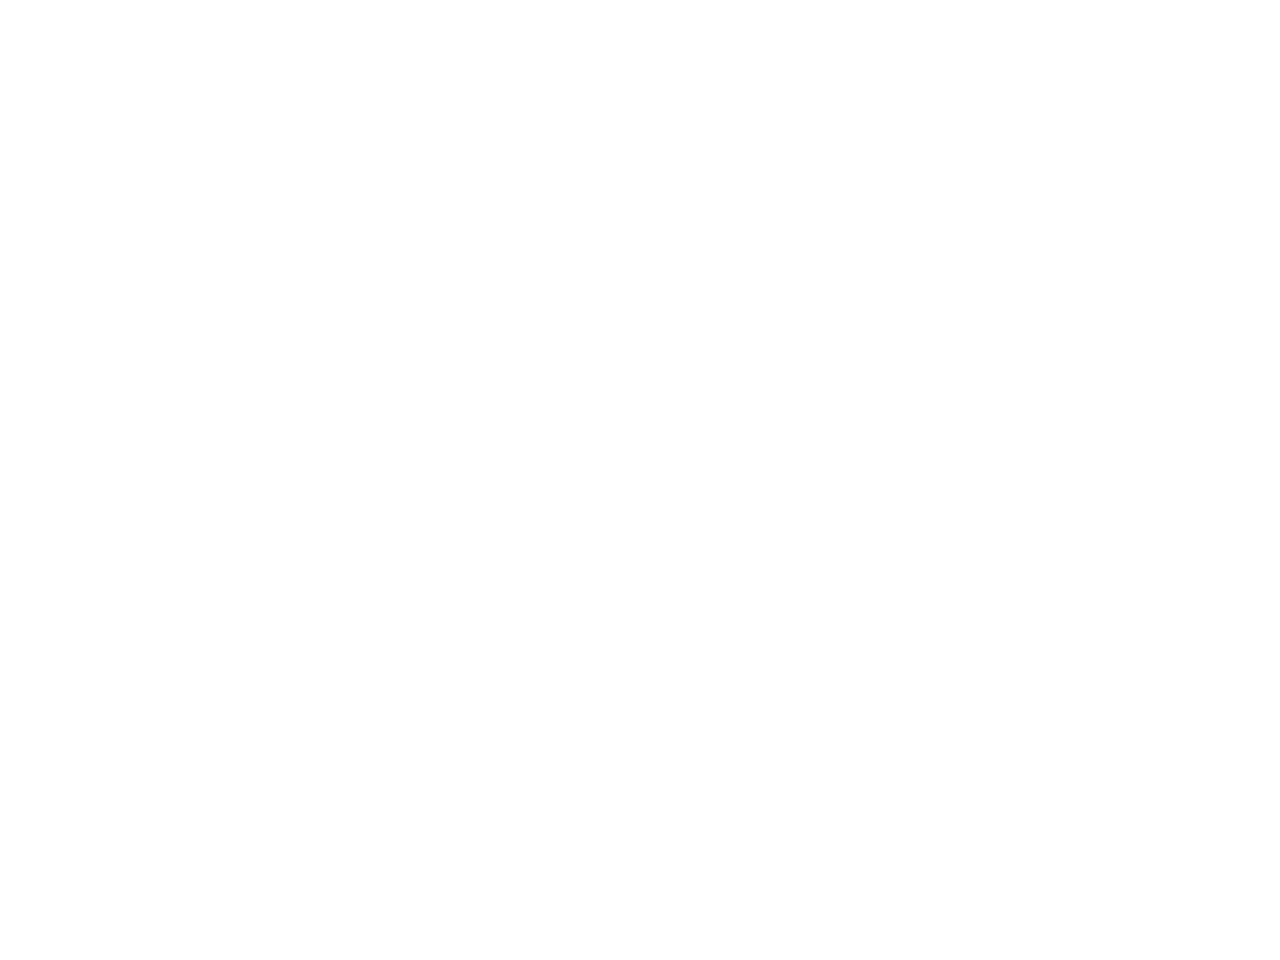

<IPython.core.display.Javascript object>


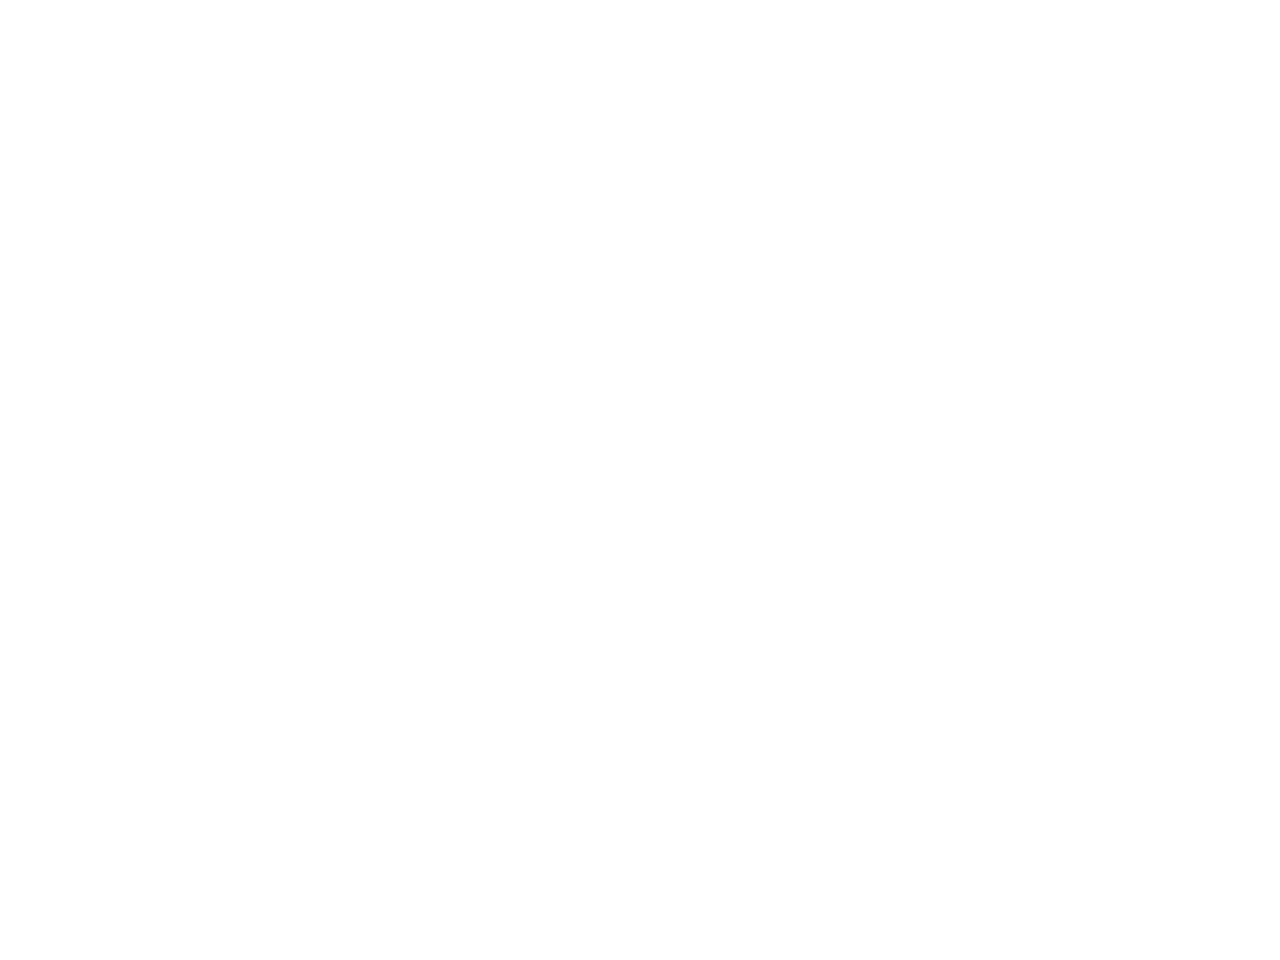

<IPython.core.display.Javascript object>


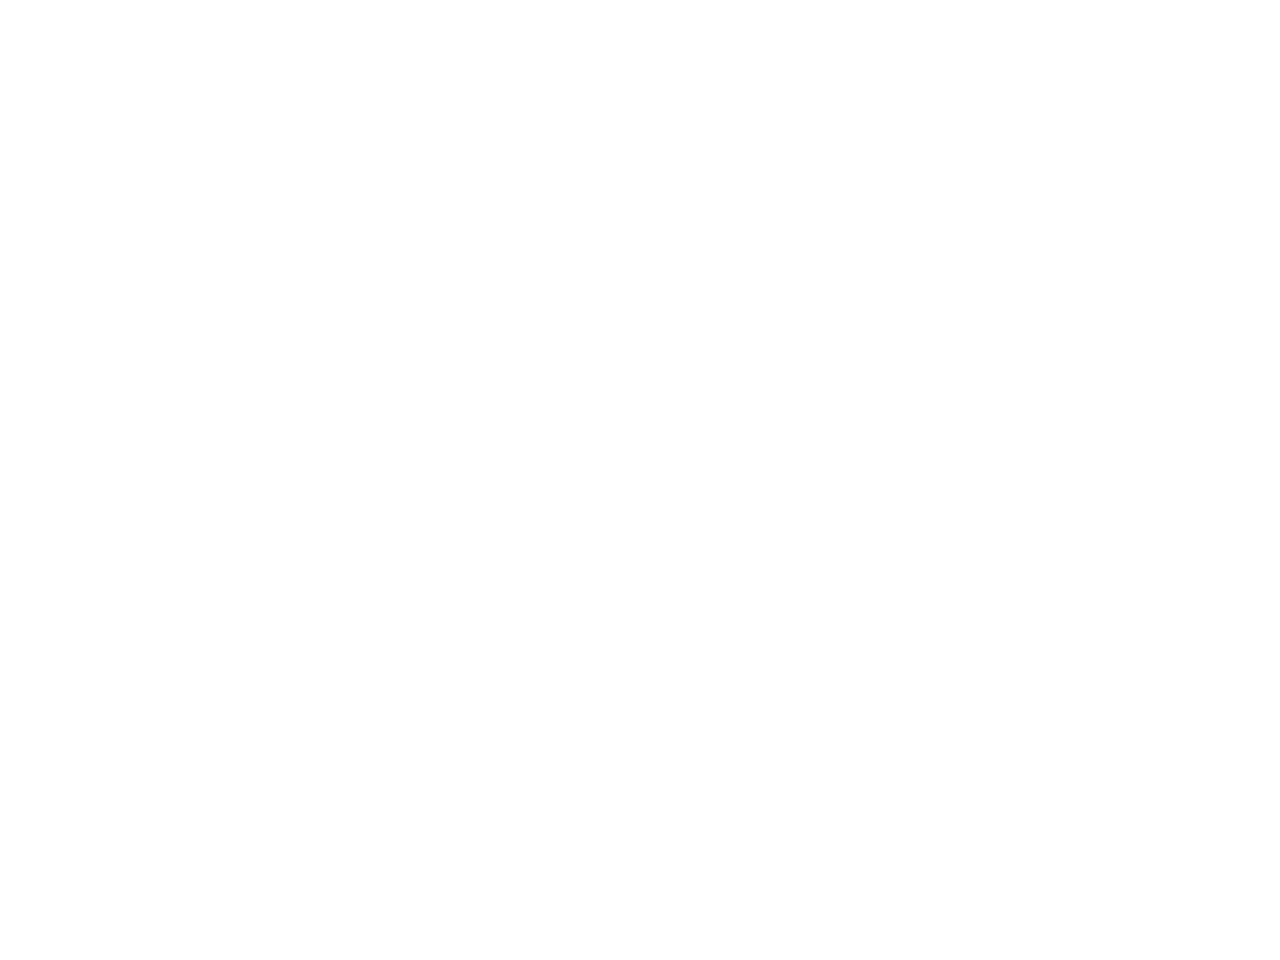

<IPython.core.display.Javascript object>


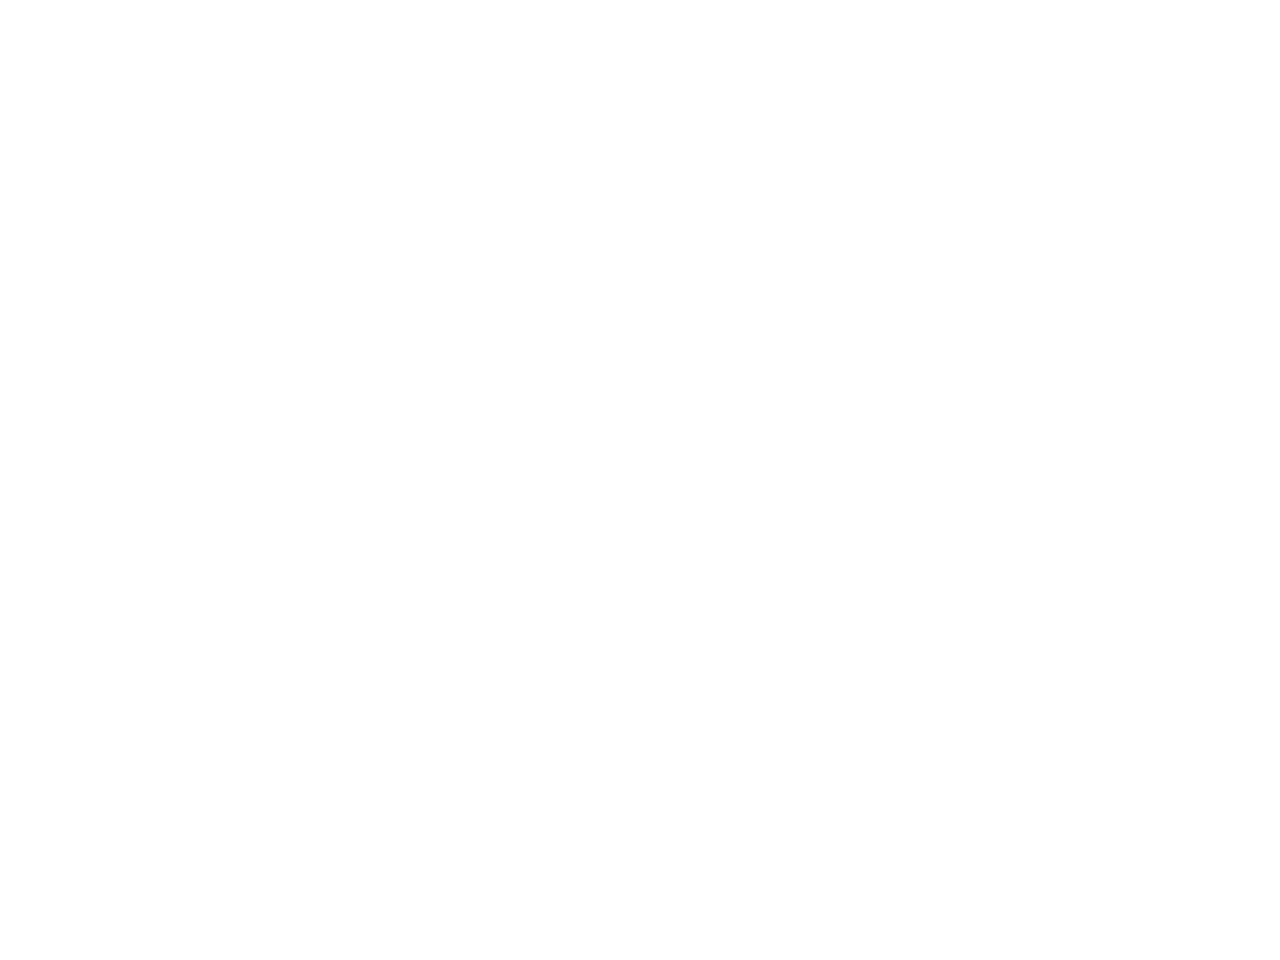

<IPython.core.display.Javascript object>


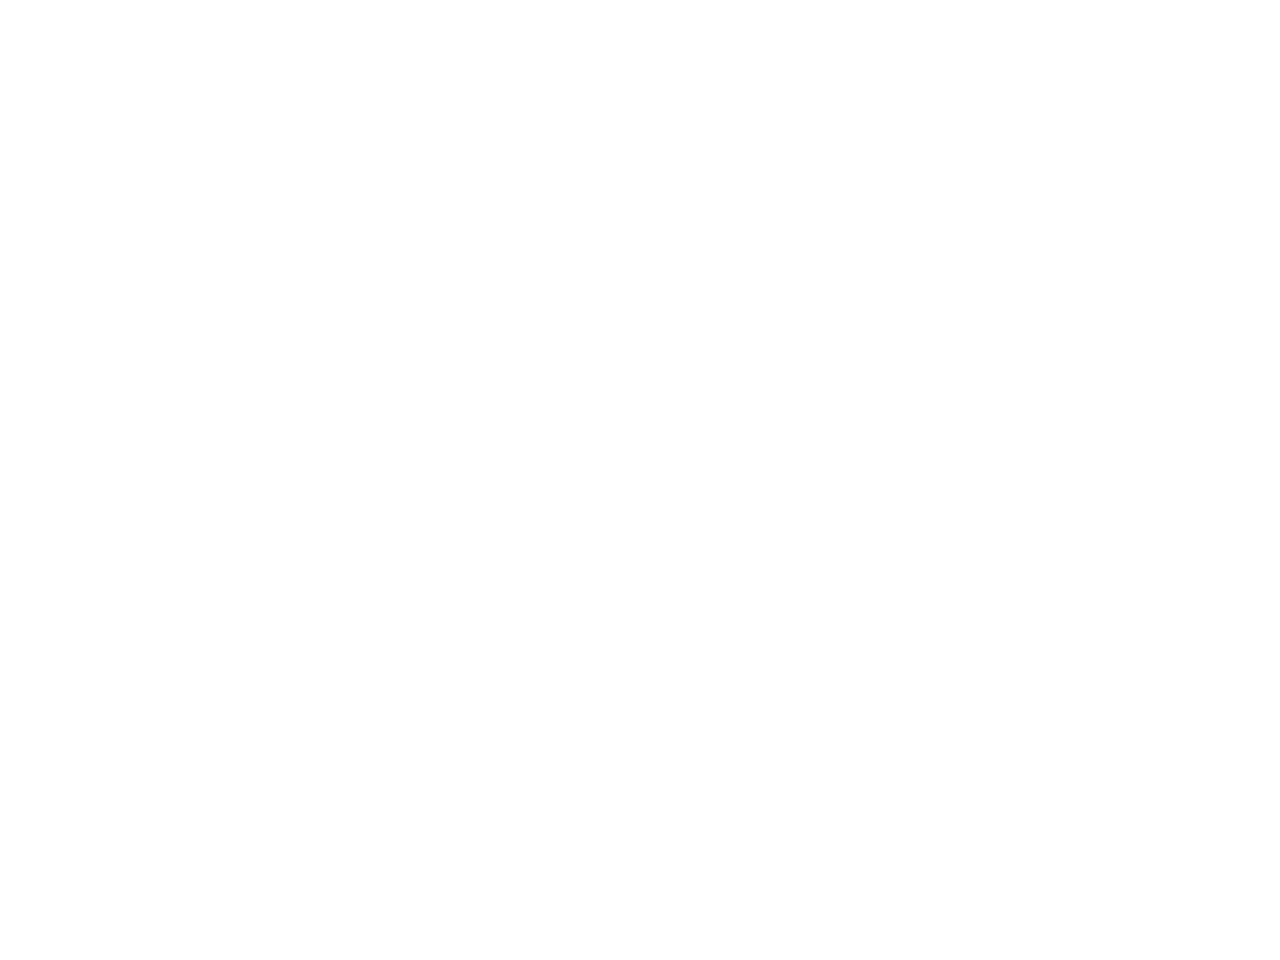

In [44]:
DeviatieData = {'RXs':[], 'LXs': []}
# fig, axis = plt.subplots(nrows=3, ncols=2)
x = np.linspace(0, 30, 1000)
origurl = '/datb/ortho/'
for categorie in listdir(origurl):
    url = origurl + categorie + '/'
    
    # URL looks like: /datb/ortho/Cat1/
    for num, OefeningDir in enumerate(listdir(url)):
        caturl = url + OefeningDir + '/'
        posx = num % 2
        posy = math.floor(num /2)
        # URL looks like: /datb/ortho/Cat1/Oefening1/
        for PatientFile in listdir(caturl):
            df_cleaned = pd.read_csv('/data/ortho/%s' % PatientFile, header=None)

            df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
            df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
            df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
            df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
            df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
            df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
            df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
            df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
            df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
            df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

            RXavg = df_cleaned['clavicula_r_x'].mean()
            RXs = math.sqrt(sum([(i-RXavg) ** 2 for i in df_cleaned['clavicula_r_x']])/(len(df_cleaned['clavicula_r_x'])-1))

            LXavg = df_cleaned['clavicula_l_x'].mean()
            LXs = math.sqrt(sum([(i-LXavg) ** 2 for i in df_cleaned['clavicula_l_x']])/(len(df_cleaned['clavicula_l_x'])-1))

            DeviatieData['RXs'].append(RXs)
            DeviatieData['LXs'].append(LXs)
        Deviatiedf = pd.DataFrame(data=DeviatieData)
    #     Deviatiedf.plot.scatter(x='RXs', y='LXs', ax=axis[posy, posx])
        Deviatiedf.plot.scatter(x='RXs', y='LXs')
        plt.plot(x,x, color='crimson', label='45 deg')
        plt.legend()
        PatientNum = PatientFile.split('_')[1]
        title = '%s %s' % (categorie, OefeningDir)
        plt.title(title)
        
        plt.savefig('Standaard Deviatie IMG/%s.png' % title)
        plt.close()

In [16]:
print(listdir('/datb/ortho/Cat3/Oefening 4/'))

['Cat3_pat18_meting2_oef4.csv', 'Cat3_pat38_meting2_oef4.csv', 'Cat3_pat32_meting1_oef4.csv', 'Cat3_pat17_meting2_oef4.csv', 'Cat3_pat16_meting1_oef4.csv', 'Cat3_pat31_meting1_oef4.csv', 'Cat3_pat7_meting1_oef4.csv', 'Cat3_pat37_meting1_oef4.csv', 'Cat3_pat20_meting2_oef4.csv', 'Cat3_pat36_meting1_oef4.csv', 'Cat3_pat20_meting1_oef4.csv', 'Cat3_pat33_meting2_oef4.csv', 'Cat3_pat26_meting1_oef4.csv', 'Cat3_pat31_meting2_oef4.csv', 'Cat3_pat1_meting2_oef4.csv', 'Cat3_pat29_meting2_oef4.csv', 'Cat3_pat22_meting1_oef4.csv', 'Cat3_pat14_meting1_oef4.csv', 'Cat3_pat34_meting2_oef4.csv', 'Cat3_pat30_meting1_oef4.csv', 'Cat3_pat24_meting1_oef4.csv', 'Cat3_pat14_meting2_oef4.csv', 'Cat3_pat37_meting2_oef4.csv', 'Cat3_pat35_meting1_oef4.csv', 'Cat3_pat33_meting1_oef4.csv', 'Cat3_pat21_meting2_oef4.csv', 'Cat3_pat23_meting1_oef4.csv', 'Cat3_pat38_meting1_oef4.csv', 'Cat3_pat18_meting1_oef4.csv', 'Cat3_pat10_meting2_oef4.csv', 'Cat3_pat7_meting2_oef4.csv', 'Cat3_pat36_meting2_oef4.csv', 'Cat3_pat2